In [136]:
import sys
sys.path.append('../../../epftoolbox/')

In [137]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt

from evaluation import MAE, sMAPE, MAPE, rMAE
from data import read_local_data, read_data
import pandas as pd
import numpy as np
import datetime as dt
import os
#pd.options.display.max_rows=None

In [138]:
# Paths

lear_preds_path = '../../../examples/experimental_files/fc_nl_datFR_BEGIN_None_YT2_CW1456.csv' 
dnn_preds_path = '../../../examples/experimental_files/fc_nl2_datFR_YT2_SF1_CW4_1new.csv'
real_values_path = '../../../examples/datasets/FR_NEW_UTC_W_RENEW.csv'
fournisseur_preds_path = '../../../examples/datasets/FR_fournisseur.csv'
lear_w_renew_preds_path = '../../../examples/experimental_files/fc_nl_datFR_NEW_UTC_W_RENEW_YT2_CW728.csv'
dnn_w_renew_preds_path = '../../../examples/experimental_files/fc_nl3_datFR_NEW_UTC_W_RENEW_YT1_SF1_CW2_1_W_RENEW.csv'

In [139]:
p_real = np.array([300, 310, 320, 308])
p_pred = np.array([304, 308, 331, 301])
np.mean(np.abs(p_real - p_pred))

6.0

In [140]:
df = pd.read_csv('../../../examples/datasets/FR_NEW_UTC.csv')
df.sample()
price = df['Price']
df = df.drop(['Price'], axis=1)
df.insert(1, 'Price', price)
df.sample()

Date   Price  Load forecast  Generation forecast
47960  2022-06-22 08:00:00  437.42        51800.0              44406.0

In [141]:

df.to_csv('../../../examples/datasets/FR_NEW_UTC_FOR_C.csv', index=False)

## Calcul des erreurs pour chacun des modèles

/home/infres/dfitton-21/pfr/fil_rouge/notebook_projet/dorian/comparaison/../../../epftoolbox/data/_datasets.py:151: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  end_test_date = pd.to_datetime(end_test_date, dayfirst=True)


Test datasets: 2021-01-01 00:00:00 - 2022-12-31 23:00:00
(730, 24)
(730,)


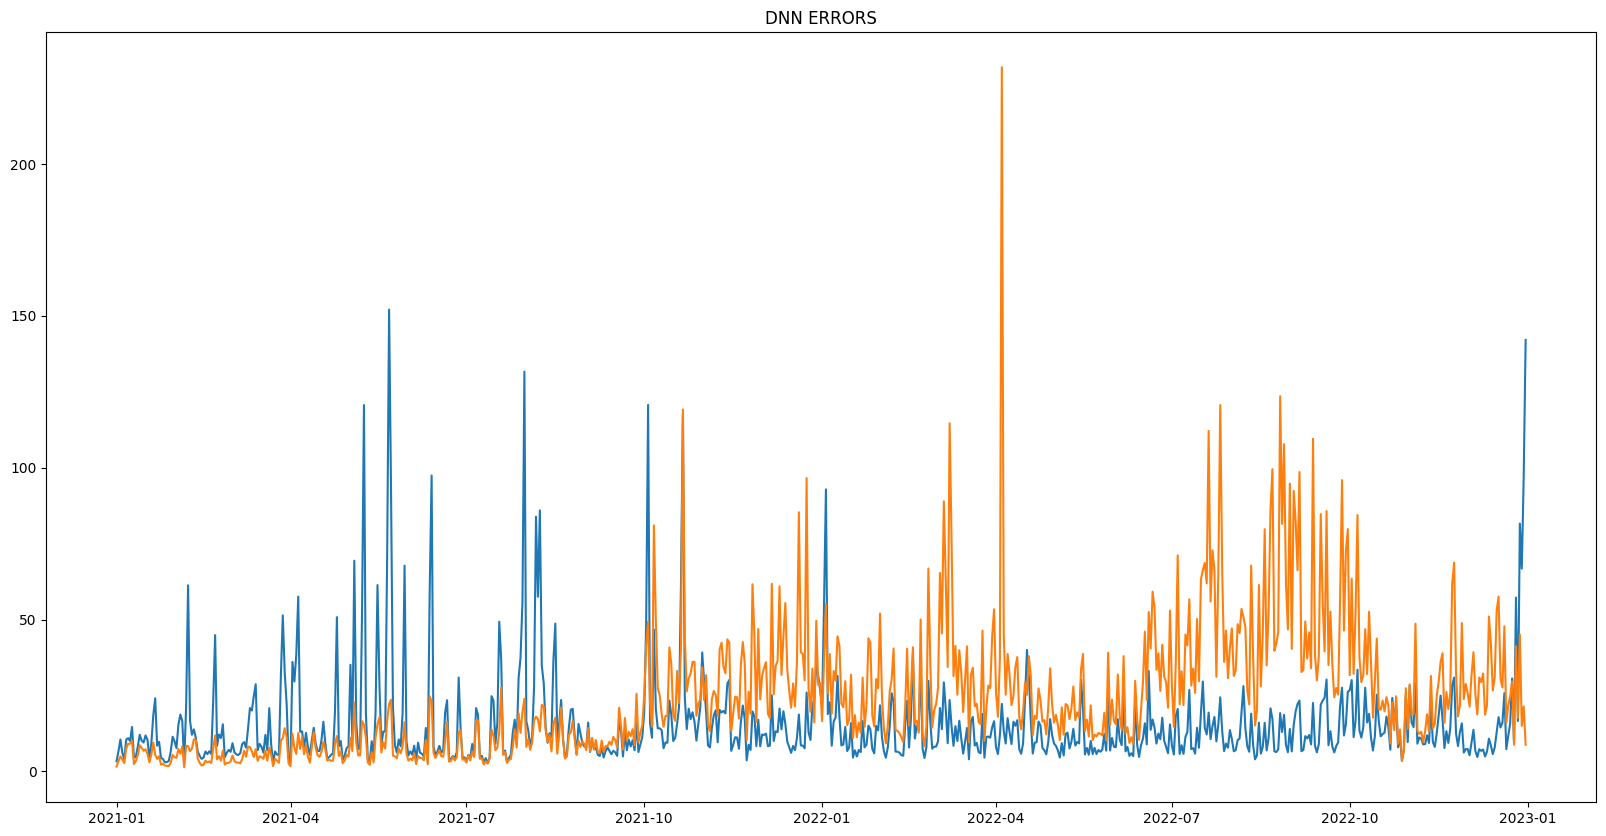

In [163]:
forecast_dnn = pd.read_csv(dnn_preds_path, index_col=0).dropna()

begin_test_date = forecast_dnn.index[0]
end_test_date = forecast_dnn.index[-1]
path_datasets_folder = os.path.join('../../../', 'examples/datasets')

df_train, df_test = read_data(dataset='FR_NEW_UTC', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)
real_values = df_test.loc[:, ['Price']].values.reshape(-1, 24)
print(real_values.shape)
real_values = pd.DataFrame(real_values, index=forecast_dnn.index, columns=forecast_dnn.columns)

MAE_DNN = np.zeros(len(forecast_dnn.index))
SMAPE_DNN = np.zeros(len(forecast_dnn.index))

i=0

for date in forecast_dnn.index:
    mae = np.mean(MAE(forecast_dnn.loc[date].values.squeeze(), real_values.loc[date].values)) 
    smape = np.mean(sMAPE(forecast_dnn.loc[date].values.squeeze(), real_values.loc[date].values)) * 100

    SMAPE_DNN[i]=smape
    MAE_DNN[i]=mae
    i+=1
forecast_dnn.index = pd.to_datetime(forecast_dnn.index).tz_localize(None)
real_values.index = pd.to_datetime(real_values.index).tz_localize(None)


d_DNN = {'sMAPE_DNN': SMAPE_DNN, 'MAE_DNN': MAE_DNN}
df_er_DNN = pd.DataFrame(data=d_DNN, index= forecast_dnn.index)
plt.figure(figsize=(20, 10))
plt.plot(df_er_DNN)
plt.title('DNN ERRORS')
plt.show()


In [221]:
forecast_dnn_h = pd.read_csv(dnn_preds_path, index_col=0).dropna()
begin_test_date = forecast_dnn_h.index[0]
end_test_date = forecast_dnn_h.index[-1]
index_h = pd.date_range(start=begin_test_date, end=pd.to_datetime(end_test_date)+pd.Timedelta(23, 'h'), freq='H')
forecast_dnn_h = pd.DataFrame(forecast_dnn_h.values.reshape(-1, 1), index = index_h)

real_values_h = df_test.loc[:, ['Price']]

MAE_DNN_h = np.zeros(len(forecast_dnn_h.index))
SMAPE_DNN_h = np.zeros(len(forecast_dnn_h.index))
i=0

for date in forecast_dnn_h.index:
    mae = MAE(forecast_dnn_h.loc[date].values, real_values_h.loc[date].values) 
    smape = sMAPE(forecast_dnn_h.loc[date].values.squeeze(), real_values_h.loc[date].values) * 100

    SMAPE_DNN_h[i]=smape
    MAE_DNN_h[i]=mae
    i+=1

d_DNN_h = {'sMAPE_DNN_h': SMAPE_DNN_h, 'MAE_DNN_h': MAE_DNN_h}
df_er_DNN_h = pd.DataFrame(data=d_DNN_h, index= forecast_dnn_h.index)

/home/infres/dfitton-21/pfr/fil_rouge/notebook_projet/dorian/comparaison/../../../epftoolbox/data/_datasets.py:151: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  end_test_date = pd.to_datetime(end_test_date, dayfirst=True)


Test datasets: 2021-01-01 00:00:00 - 2022-01-30 23:00:00
(395, 24)


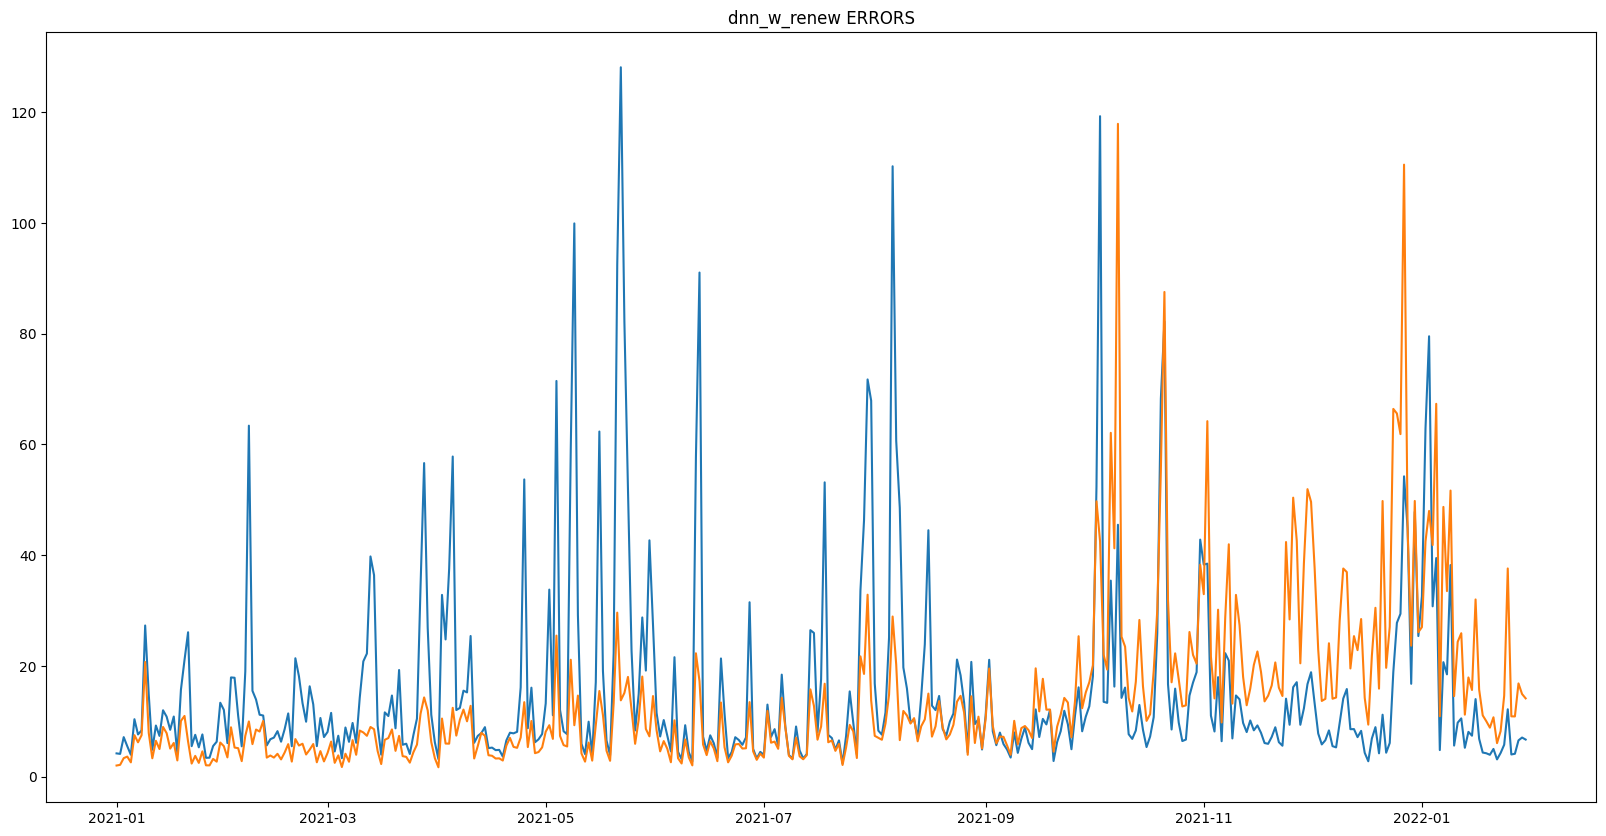

In [266]:
forecast_dnn_w_renew = pd.read_csv(dnn_w_renew_preds_path, index_col=0).dropna()

begin_test_date = forecast_dnn_w_renew.index[0]
end_test_date = forecast_dnn_w_renew.index[-1]
#end_test_date = '17/01/2022 00:00:00'
path_datasets_folder = os.path.join('../../../', 'examples/datasets')

df_train, df_test = read_data(dataset='FR_NEW_UTC', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)
real_values = df_test.loc[:, ['Price']].values.reshape(-1, 24)
print(real_values.shape)
real_values = pd.DataFrame(real_values, index=forecast_dnn_w_renew.index, columns=forecast_dnn_w_renew.columns)

MAE_dnn_w_renew = np.zeros(len(forecast_dnn_w_renew.index))
SMAPE_dnn_w_renew = np.zeros(len(forecast_dnn_w_renew.index))

i=0

for date in forecast_dnn_w_renew.index:
    mae = np.mean(MAE(forecast_dnn_w_renew.loc[date].values.squeeze(), real_values.loc[date].values)) 
    smape = np.mean(sMAPE(forecast_dnn_w_renew.loc[date].values.squeeze(), real_values.loc[date].values)) * 100

    SMAPE_dnn_w_renew[i]=smape
    MAE_dnn_w_renew[i]=mae
    i+=1
forecast_dnn_w_renew.index = pd.to_datetime(forecast_dnn_w_renew.index).tz_localize(None)
real_values.index = pd.to_datetime(real_values.index).tz_localize(None)


d_dnn_w_renew = {'sMAPE_dnn_w_renew': SMAPE_dnn_w_renew, 'MAE_dnn_w_renew': MAE_dnn_w_renew}
df_er_dnn_w_renew = pd.DataFrame(data=d_dnn_w_renew, index= forecast_dnn_w_renew.index)
plt.figure(figsize=(20, 10))
plt.plot(df_er_dnn_w_renew)
plt.title('dnn_w_renew ERRORS')
plt.show()


In [232]:
forecast_dnn_w_renew_h = pd.read_csv(dnn_w_renew_preds_path, index_col=0).dropna()
begin_test_date = forecast_dnn_w_renew_h.index[0]
end_test_date = forecast_dnn_w_renew_h.index[-1]
index_h = pd.date_range(start=begin_test_date, end=pd.to_datetime(end_test_date)+pd.Timedelta(23, 'h'), freq='H')
forecast_dnn_w_renew_h = pd.DataFrame(forecast_dnn_w_renew_h.values.reshape(-1, 1), index = index_h)

real_values_h = df_test.loc[:, ['Price']]

MAE_dnn_w_renew_h = np.zeros(len(forecast_dnn_w_renew_h.index))
SMAPE_dnn_w_renew_h = np.zeros(len(forecast_dnn_w_renew_h.index))
i=0

for date in forecast_dnn_w_renew_h.index:
    mae = MAE(forecast_dnn_w_renew_h.loc[date].values, real_values_h.loc[date].values) 
    smape = sMAPE(forecast_dnn_w_renew_h.loc[date].values.squeeze(), real_values_h.loc[date].values) * 100

    SMAPE_dnn_w_renew_h[i]=smape
    MAE_dnn_w_renew_h[i]=mae
    i+=1

d_dnn_w_renew_h = {'sMAPE_dnn_w_renew_h': SMAPE_dnn_w_renew_h, 'MAE_dnn_w_renew_h': MAE_dnn_w_renew_h}
df_er_dnn_w_renew_h = pd.DataFrame(data=d_dnn_w_renew_h, index= forecast_dnn_w_renew_h.index)

Test datasets: 2021-01-03 00:00:00 - 2022-12-31 23:00:00
(728, 24)


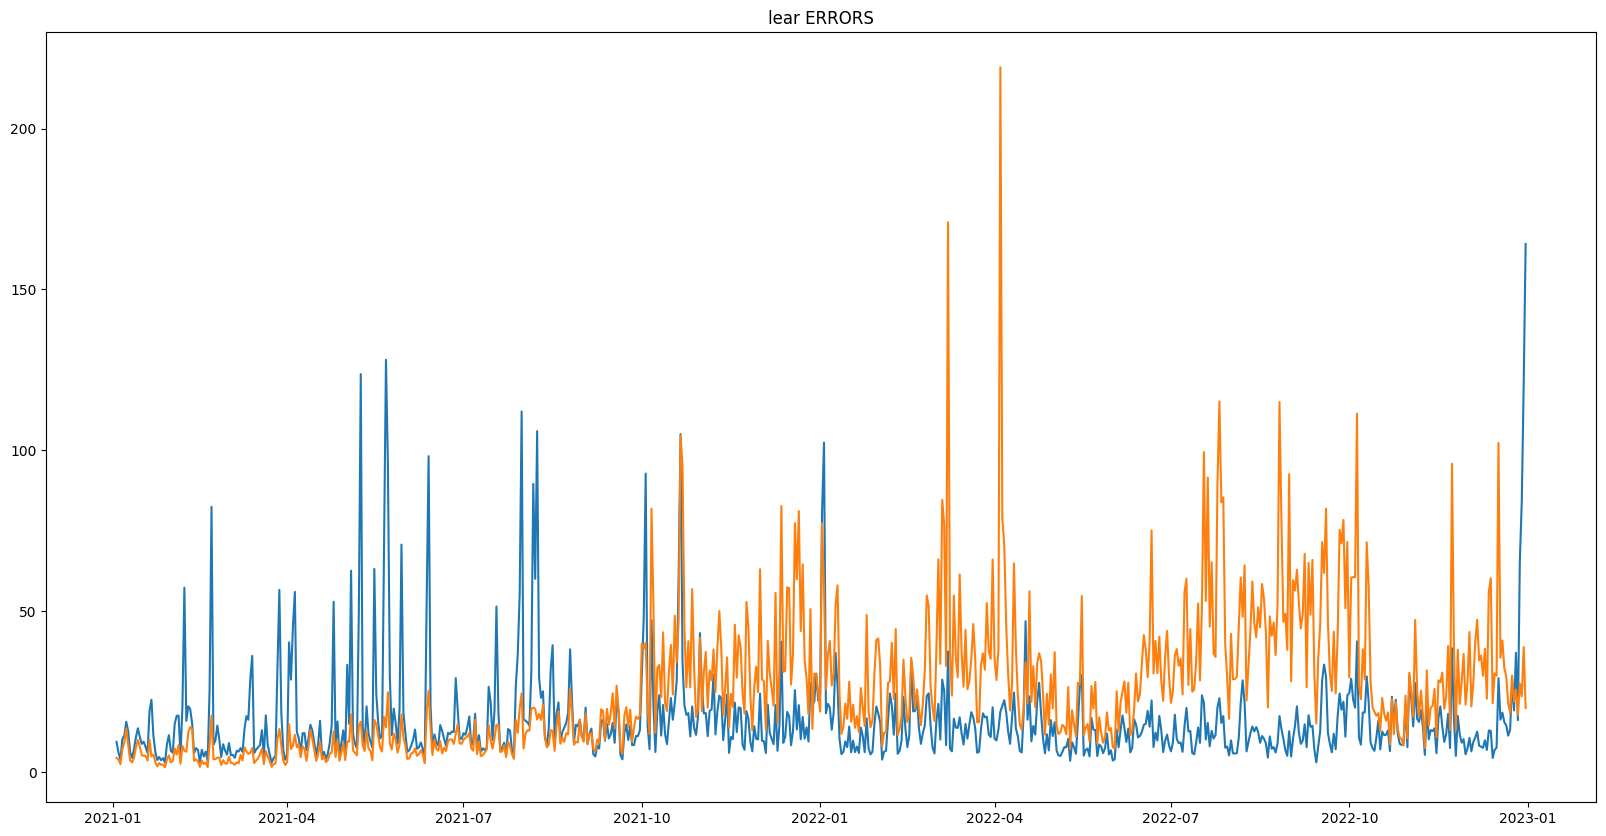

In [233]:
forecast_lear = pd.read_csv(lear_preds_path, index_col=0).dropna()

begin_test_date = pd.to_datetime(forecast_lear.index[0])
end_test_date = pd.to_datetime(forecast_lear.index[-1])
path_datasets_folder = os.path.join('../../../', 'examples/datasets')

df_train, df_test = read_data(dataset='FR_NEW_UTC', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)
real_values = df_test.loc[:, ['Price']].values.reshape(-1, 24)
print(real_values.shape)
real_values = pd.DataFrame(real_values, index=forecast_lear.index, columns=forecast_lear.columns)

MAE_lear = np.zeros(len(forecast_lear.index))
SMAPE_lear = np.zeros(len(forecast_lear.index))

i=0

for date in forecast_lear.index:
    mae = np.mean(MAE(forecast_lear.loc[date].values.squeeze(), real_values.loc[date].values)) 
    smape = np.mean(sMAPE(forecast_lear.loc[date].values.squeeze(), real_values.loc[date].values)) * 100

    SMAPE_lear[i]=smape
    MAE_lear[i]=mae
    i+=1
forecast_lear.index = pd.to_datetime(forecast_lear.index).tz_localize(None)
real_values.index = pd.to_datetime(real_values.index).tz_localize(None)


d_lear = {'sMAPE_lear': SMAPE_lear, 'MAE_lear': MAE_lear}
df_er_lear = pd.DataFrame(data=d_lear, index= forecast_lear.index)
plt.figure(figsize=(20, 10))
plt.plot(df_er_lear)
plt.title('lear ERRORS')
plt.show()


In [234]:
forecast_lear_h = pd.read_csv(lear_preds_path, index_col=0).dropna()
begin_test_date = forecast_lear_h.index[0]
end_test_date = forecast_lear_h.index[-1]
index_h = pd.date_range(start=begin_test_date, end=pd.to_datetime(end_test_date)+pd.Timedelta(23, 'h'), freq='H')
forecast_lear_h = pd.DataFrame(forecast_lear_h.values.reshape(-1, 1), index = index_h)

real_values_h = df_test.loc[:, ['Price']]

MAE_lear_h = np.zeros(len(forecast_lear_h.index))
SMAPE_lear_h = np.zeros(len(forecast_lear_h.index))
i=0

for date in forecast_lear_h.index:
    mae = MAE(forecast_lear_h.loc[date].values, real_values_h.loc[date].values) 
    smape = sMAPE(forecast_lear_h.loc[date].values.squeeze(), real_values_h.loc[date].values) * 100

    SMAPE_lear_h[i]=smape
    MAE_lear_h[i]=mae
    i+=1

d_lear_h = {'sMAPE_lear_h': SMAPE_lear_h, 'MAE_lear_h': MAE_lear_h}
df_er_lear_h = pd.DataFrame(data=d_lear_h, index= forecast_lear_h.index)

Test datasets: 2021-01-01 00:00:00 - 2022-01-07 23:00:00


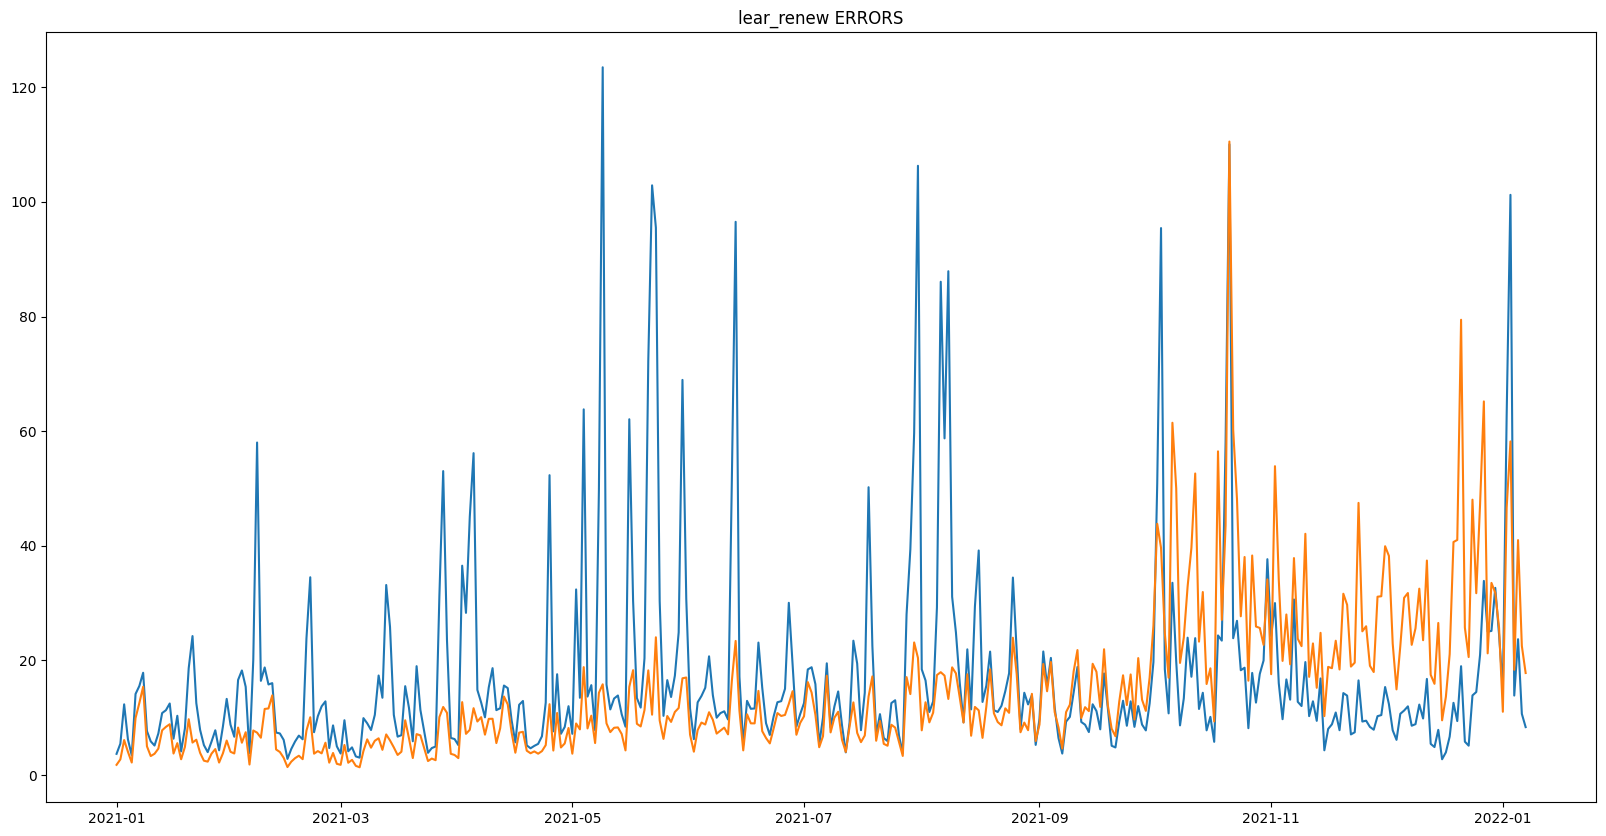

In [235]:
forecast_lear_renew = pd.read_csv(lear_w_renew_preds_path, index_col=0).dropna()
begin_test_date = pd.to_datetime(forecast_lear_renew.index[0])
end_test_date = pd.to_datetime(forecast_lear_renew.index[-1])
path_datasets_folder = os.path.join('../../../', 'examples/datasets')

df_train, df_test = read_data(dataset='FR_NEW_UTC', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)
real_values = df_test.loc[:, ['Price']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=forecast_lear_renew.index, columns=forecast_lear_renew.columns)

MAE_lear_renew = np.zeros(len(forecast_lear_renew.index))
SMAPE_lear_renew = np.zeros(len(forecast_lear_renew.index))

i=0

for date in forecast_lear_renew.index:
    mae = np.mean(MAE(forecast_lear_renew.loc[date].values.squeeze(), real_values.loc[date].values)) 
    smape = np.mean(sMAPE(forecast_lear_renew.loc[date].values.squeeze(), real_values.loc[date].values)) * 100

    SMAPE_lear_renew[i]=smape
    MAE_lear_renew[i]=mae
    i+=1
forecast_lear_renew.index = pd.to_datetime(forecast_lear_renew.index).tz_localize(None)
real_values.index = pd.to_datetime(real_values.index).tz_localize(None)


d_lear_renew = {'sMAPE_lear_renew': SMAPE_lear_renew, 'MAE_lear_renew': MAE_lear_renew}
df_er_lear_renew = pd.DataFrame(data=d_lear_renew, index= forecast_lear_renew.index)
plt.figure(figsize=(20, 10))
plt.plot(df_er_lear_renew)
plt.title('lear_renew ERRORS')
plt.show()


In [236]:
forecast_lear_renew_h = pd.read_csv(lear_w_renew_preds_path, index_col=0).dropna()
begin_test_date = forecast_lear_renew_h.index[0]
end_test_date = forecast_lear_renew_h.index[-1]
index_h = pd.date_range(start=begin_test_date, end=pd.to_datetime(end_test_date)+pd.Timedelta(23, 'h'), freq='H')
forecast_lear_renew_h = pd.DataFrame(forecast_lear_renew_h.values.reshape(-1, 1), index = index_h)

real_values_h = df_test.loc[:, ['Price']]

MAE_lear_renew_h = np.zeros(len(forecast_lear_renew_h.index))
SMAPE_lear_renew_h = np.zeros(len(forecast_lear_renew_h.index))
i=0

for date in forecast_lear_renew_h.index:
    mae = MAE(forecast_lear_renew_h.loc[date].values, real_values_h.loc[date].values) 
    smape = sMAPE(forecast_lear_renew_h.loc[date].values.squeeze(), real_values_h.loc[date].values) * 100

    SMAPE_lear_renew_h[i]=smape
    MAE_lear_renew_h[i]=mae
    i+=1

d_lear_renew_h = {'sMAPE_lear_renew_h': SMAPE_lear_renew_h, 'MAE_lear_renew_h': MAE_lear_renew_h}
df_er_lear_renew_h = pd.DataFrame(data=d_lear_renew_h, index= forecast_lear_renew_h.index)

/home/infres/dfitton-21/pfr/fil_rouge/notebook_projet/dorian/comparaison/../../../epftoolbox/data/_datasets.py:151: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  end_test_date = pd.to_datetime(end_test_date, dayfirst=True)


Test datasets: 2021-01-03 00:00:00 - 2022-04-14 23:00:00


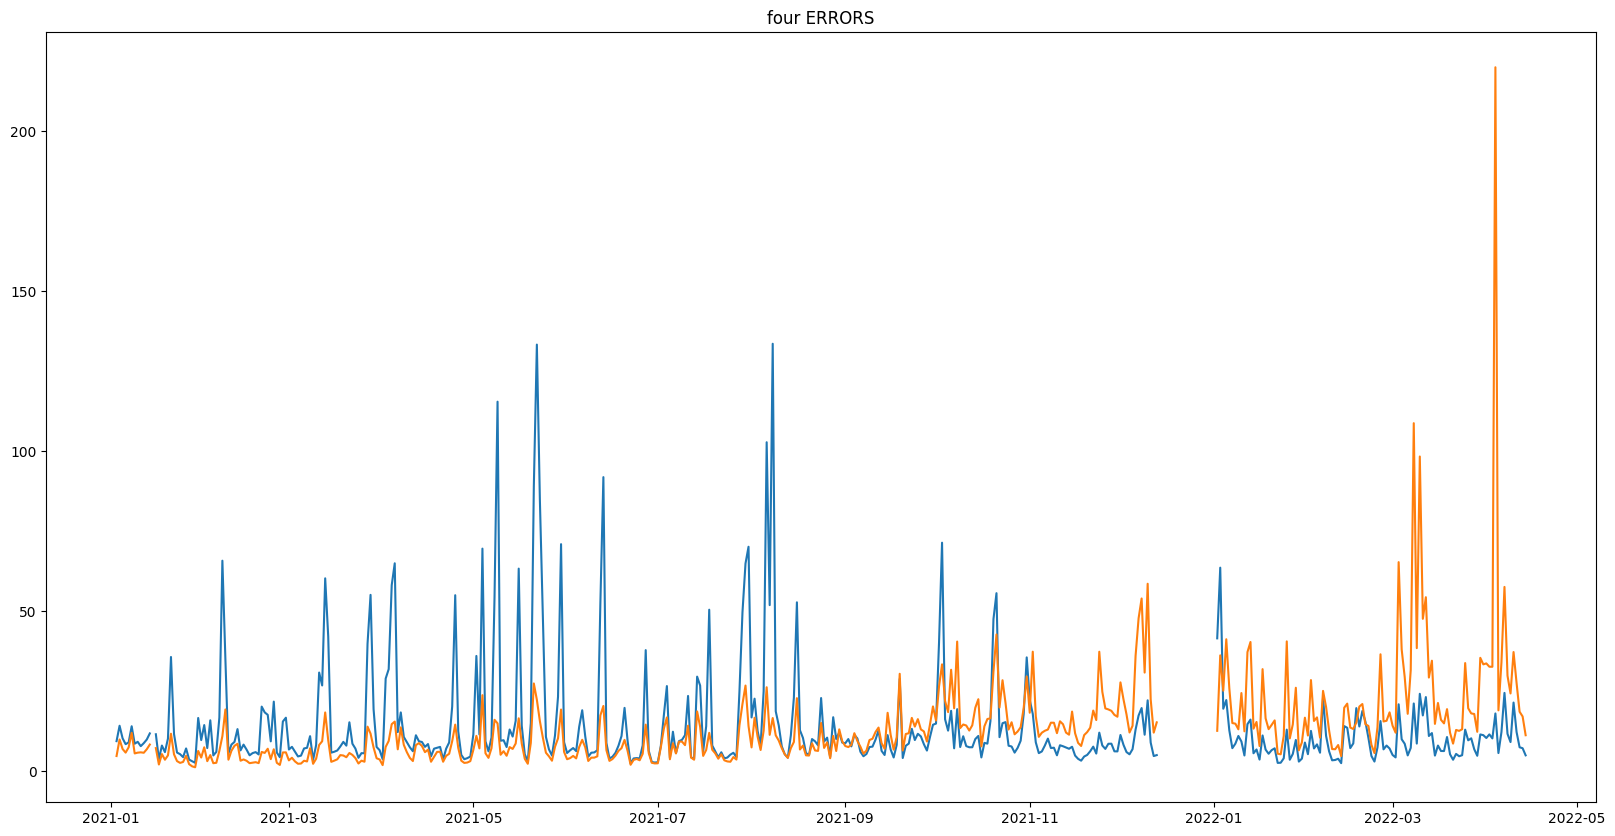

Il y a des problèmes avec certaines plages de valeurs qui sont à 0 dans les données fournisseur car pas de prédiction, cela fausse les erreurs à ces endroits là.


In [237]:
from sklearn.metrics import mean_absolute_error

forecast_fournisseur= pd.read_csv(fournisseur_preds_path)

# Convert from Chicago Local time to UTC local
forecast_fournisseur.Date_Chicago = pd.to_datetime(forecast_fournisseur.Date_Chicago).dt.tz_localize('America/Chicago', ambiguous='infer', nonexistent='shift_forward').dt.tz_convert('UTC').dt.tz_localize(None)
# Set date index
forecast_fournisseur= forecast_fournisseur.set_index('Date_Chicago', inplace=False)

# Delete duplicates
forecast_fournisseur = forecast_fournisseur[~forecast_fournisseur.index.duplicated(keep='first')]

# Create columns for date and hour
forecast_fournisseur['Date'] = forecast_fournisseur.index.date
forecast_fournisseur['Hour'] = forecast_fournisseur.index.hour

# 
index_h = pd.date_range(start=forecast_fournisseur.index[0], end=forecast_fournisseur.index[-1], freq='H')
forecast_fournisseur = forecast_fournisseur.reindex(index_h)

begin_test_date = pd.to_datetime(forecast_lear.index[0])
end_test_date = '2022-04-14 23:00:00'
# Import actual values
path_datasets_folder = os.path.join('../../../', 'examples/datasets')
df_train, df_test = read_data(dataset='FR_NEW_UTC', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)

# Create an array with 24 columns for each hour of the day for the forecast 
# and for the actual values
index_ff = pd.date_range(begin_test_date, end_test_date, freq='D')
forecast_fournisseur = (forecast_fournisseur.loc[begin_test_date:end_test_date]['price_prediction_J1']
                        .values.reshape(-1, 24)
                        .astype(float))
forecast_fournisseur = pd.DataFrame(forecast_fournisseur, index=index_ff, columns=forecast_lear.columns)

real_values =(df_test.loc[begin_test_date:end_test_date, ['Price']]
              .values.reshape(-1, 24) 
              .astype(float))
real_values = pd.DataFrame(real_values, index=index_ff, columns=forecast_lear.columns)

# Compute MAE and sMAPE errors for each day
MAE_four = np.zeros(len(forecast_fournisseur.index))
SMAPE_four = np.zeros(len(forecast_fournisseur.index))
i=0
for date in forecast_fournisseur.index:
    mae = np.mean(MAE(forecast_fournisseur.loc[date].values.squeeze(), real_values.loc[date].values)) 
    smape = np.mean(sMAPE(forecast_fournisseur.loc[date].values.squeeze(), real_values.loc[date].values)) * 100

    SMAPE_four[i]=smape
    MAE_four[i]=mae
    i+=1

#MAE_four = forecast_fournisseur.apply(lambda x: MAE(x, real_values.loc[x.name]), axis=1)
#MAE_four = forecast_fournisseur.apply(lambda x: mean_absolute_error(x, real_values), axis=1)
#SMAPE_four = forecast_fournisseur.apply(lambda x: pd.symmetric_mean_absolute_percentage_error(x, real_values), axis=1) * 100

# Plot errors
d_four = {'sMAPE_four': SMAPE_four, 'MAE_four': MAE_four}
df_er_four = pd.DataFrame(data=d_four, index= forecast_fournisseur.index)
plt.figure(figsize=(20, 10))
plt.plot(df_er_four)
plt.title('four ERRORS')
plt.show()

print('Il y a des problèmes avec certaines plages de valeurs qui sont à 0 dans les données fournisseur car pas de prédiction, cela fausse les erreurs à ces endroits là.')

In [238]:
begin_test_date = forecast_fournisseur.index[0]
end_test_date = forecast_fournisseur.index[-1]

index_h = pd.date_range(start=begin_test_date, end=pd.to_datetime(end_test_date), freq='H')

forecast_four_h = pd.DataFrame(forecast_fournisseur.values.reshape(-1, 1)[:-23], index = index_h)

real_values_h = df_test.loc[:, ['Price']]

MAE_four_h = np.zeros(len(forecast_four_h.index))
SMAPE_four_h = np.zeros(len(forecast_four_h.index))
i=0

for date in forecast_four_h.index:
    mae = MAE(forecast_four_h.loc[date].values, real_values_h.loc[date].values) 
    smape = sMAPE(forecast_four_h.loc[date].values.squeeze(), real_values_h.loc[date].values) * 100

    SMAPE_four_h[i]=smape
    MAE_four_h[i]=mae
    i+=1

d_four_h = {'sMAPE_four_h': SMAPE_four_h, 'MAE_four_h': MAE_four_h}
df_er_four_h = pd.DataFrame(data=d_four_h, index= forecast_four_h.index)


In [239]:
four_2 = pd.read_csv(fournisseur_preds_path)


## Création des datasets d'erreurs pour chacun des modèles

In [240]:
def gather_errors(df_list:list):
    df = pd.DataFrame()
    for i in range(len(df_list)):
        df = pd.concat([df, df_list[i]], axis=1)
    return df

In [241]:
df_list = [df_er_lear, df_er_four, df_er_DNN, df_er_lear_renew, df_er_dnn_w_renew]
df_error = gather_errors(df_list)
df_error.index[0]

Timestamp('2021-01-01 00:00:00')

In [242]:
df_list_h = [df_er_lear_h, df_er_four_h, df_er_DNN_h, df_er_lear_renew_h, df_er_dnn_w_renew_h]
df_error_h = gather_errors(df_list_h)
df_error_h.index[0]

Timestamp('2021-01-01 00:00:00')

## Comparaison des erreurs 

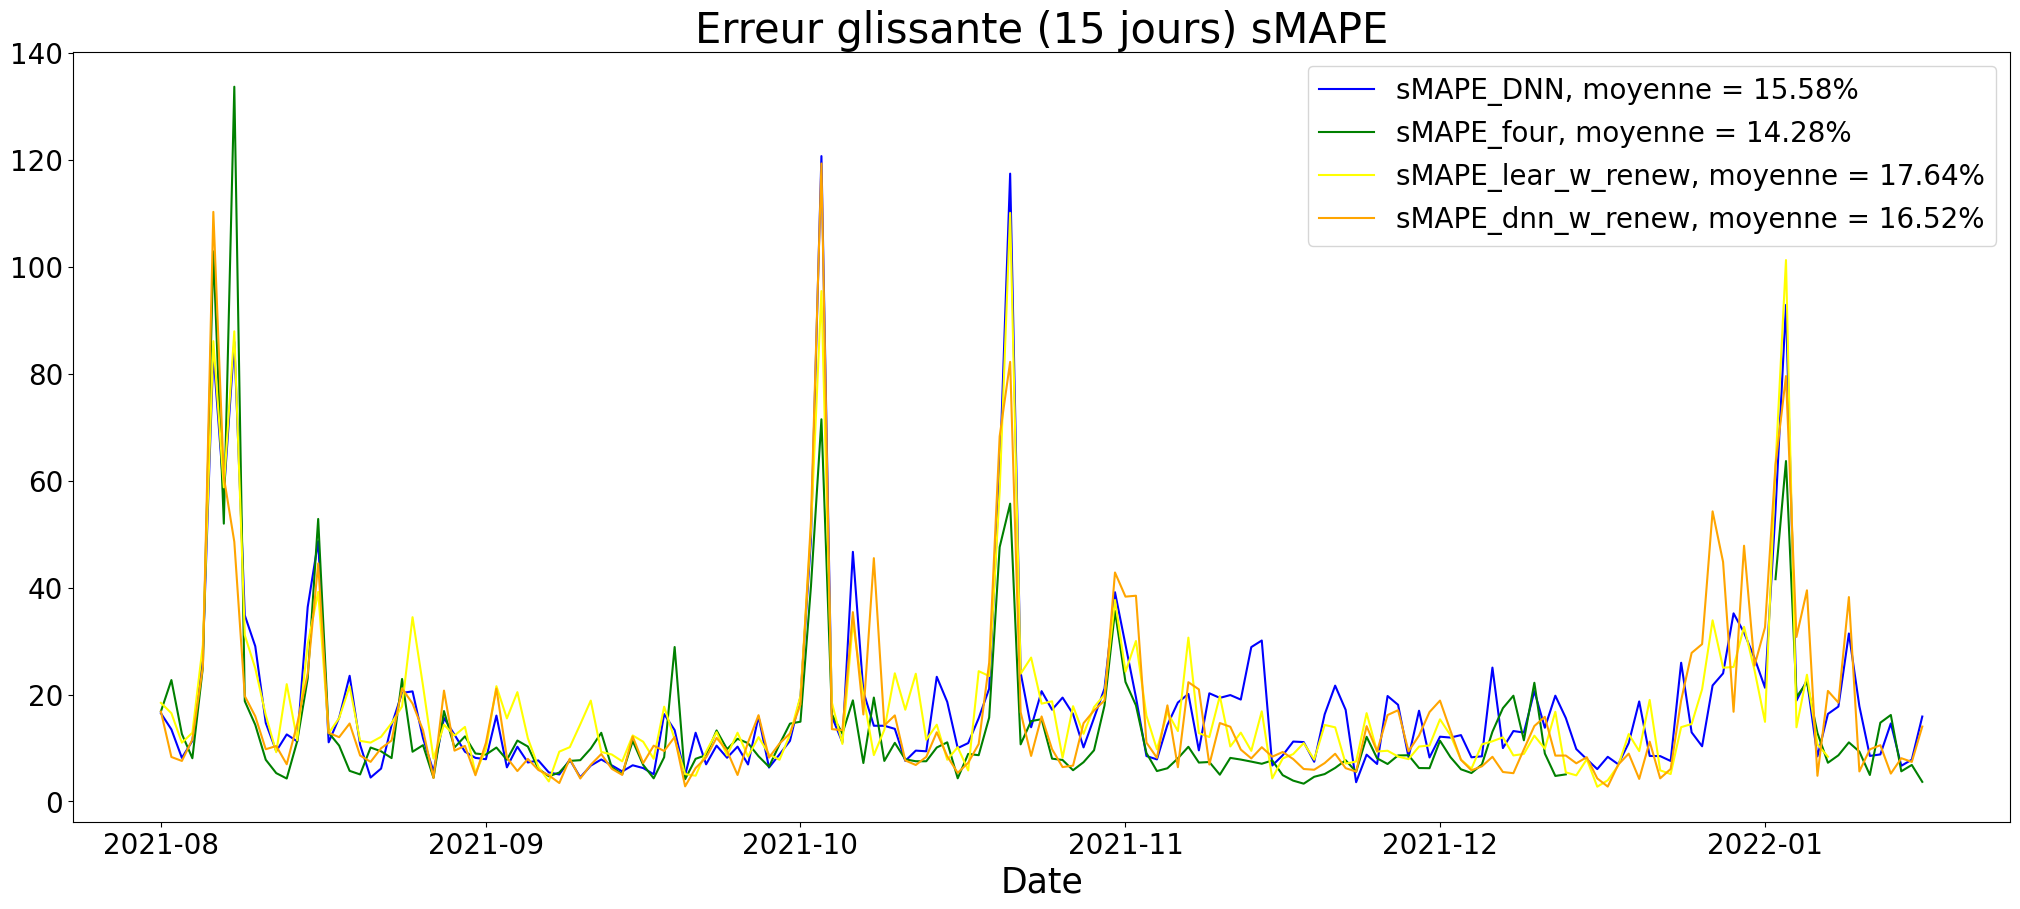

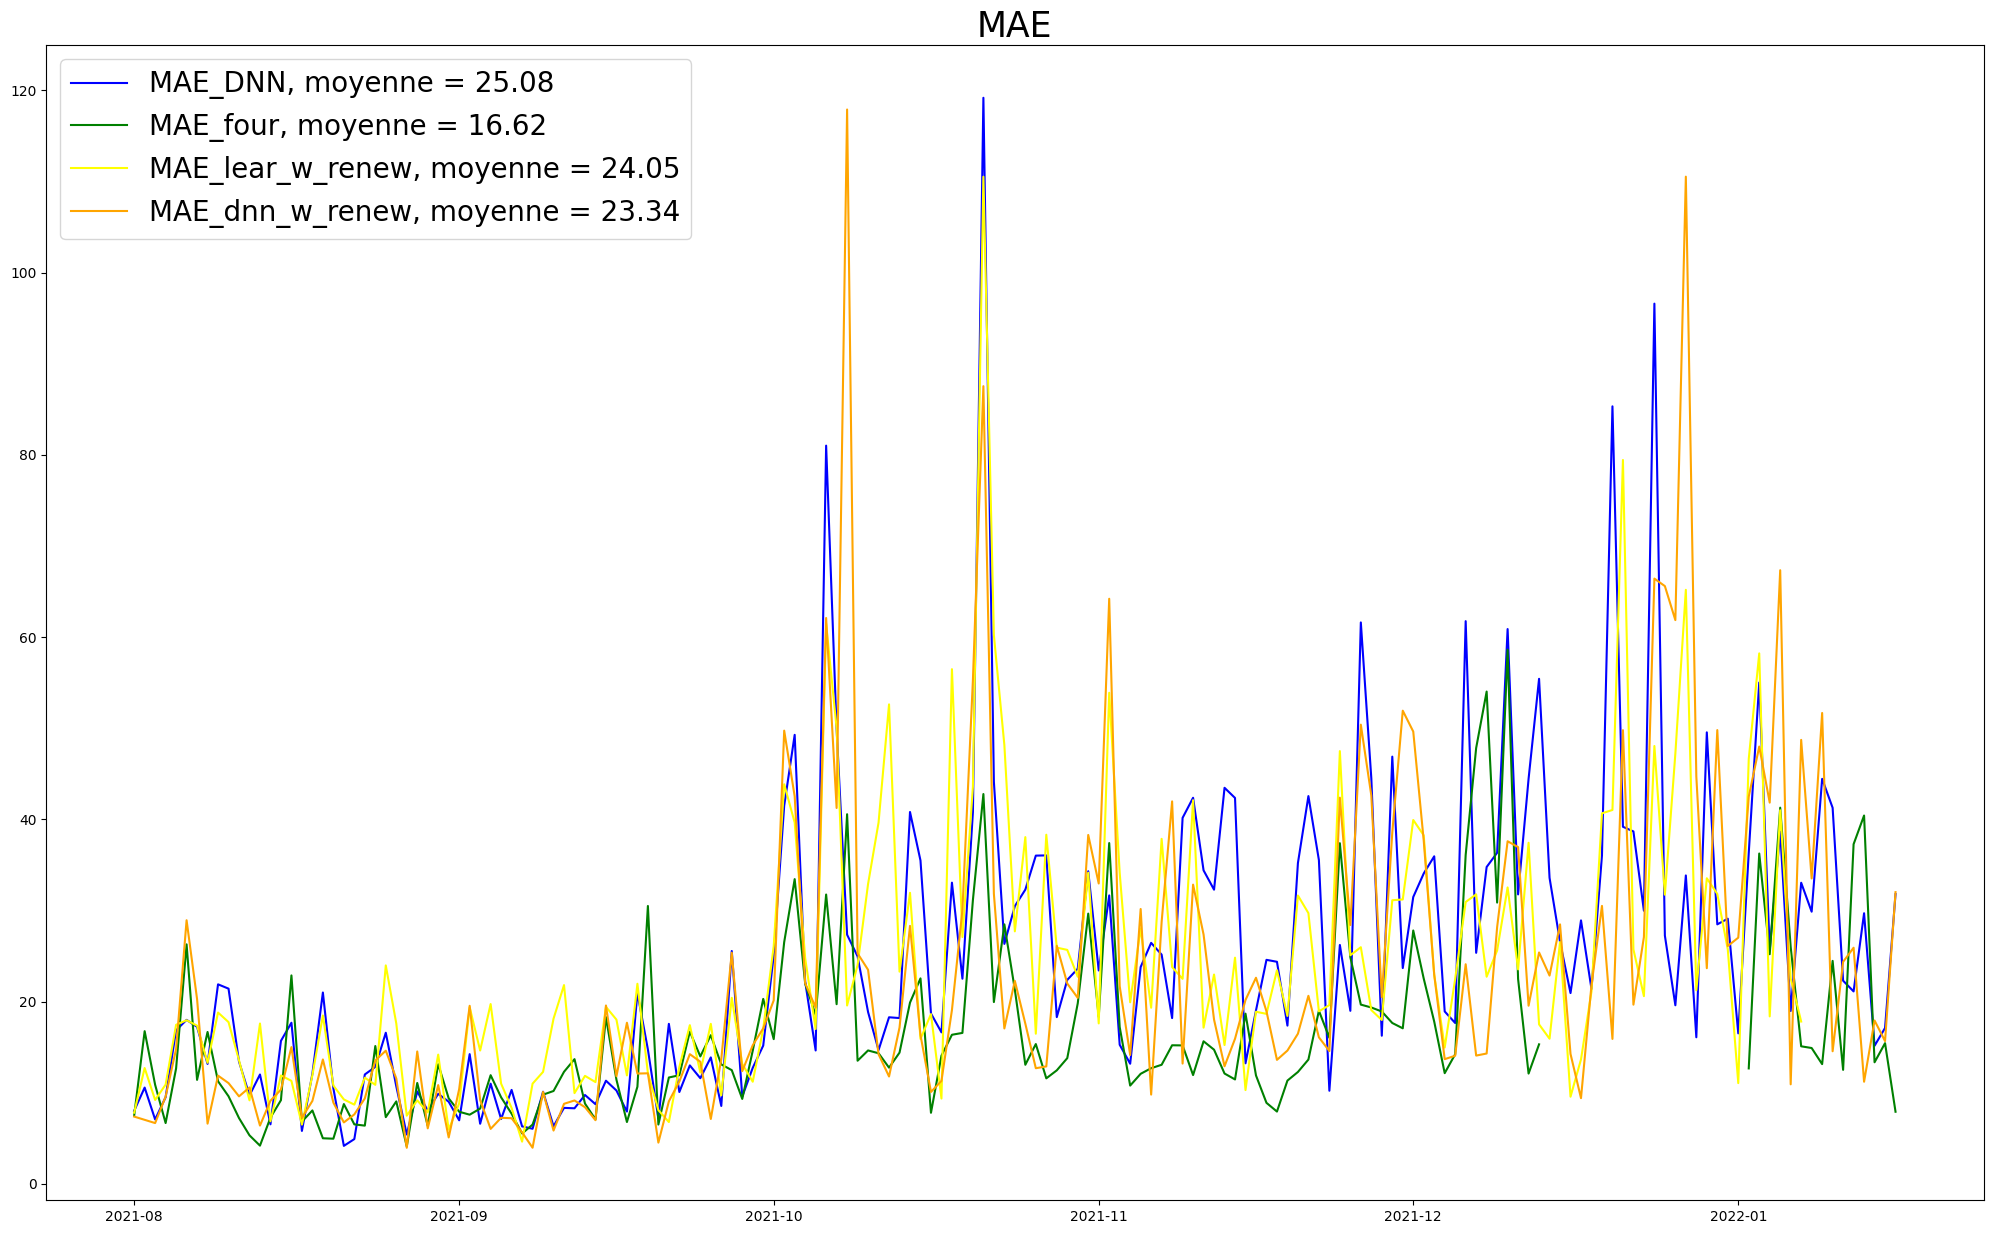

In [243]:
smape_columns = ['sMAPE_DNN', 'sMAPE_lear', 'sMAPE_four', 'sMAPE_lear_renew', 'sMAPE_dnn_w_renew']
mae_columns = ['MAE_DNN', 'MAE_lear', 'MAE_four', 'MAE_lear_renew', 'MAE_dnn_w_renew']
date_deb = pd.to_datetime('01/08/2021', format='%d/%m/%Y')
date_fin = pd.to_datetime('16/01/2022', format='%d/%m/%Y')
plt.figure(figsize=(25, 10))
plt.plot(df_error[smape_columns[0]].loc[date_deb:date_fin], color='blue', label=f'sMAPE_DNN, moyenne = {df_error[smape_columns[0]].mean():.2f}%')
#plt.plot(df_error[smape_columns[1]].loc[date_deb:date_fin], color='red', label=f'sMAPE_lear, moyenne = {df_error[smape_columns[1]].mean():.2f}%')
plt.plot(df_error[smape_columns[2]].loc[date_deb:date_fin], color='green', label=f'sMAPE_four, moyenne = {df_error[smape_columns[2]].mean():.2f}%')
plt.plot(df_error[smape_columns[3]].loc[date_deb:date_fin], color='yellow', label=f'sMAPE_lear_w_renew, moyenne = {df_error[smape_columns[3]].mean():.2f}%')
plt.plot(df_error[smape_columns[4]].loc[date_deb:date_fin], color='orange', label=f'sMAPE_dnn_w_renew, moyenne = {df_error[smape_columns[4]].mean():.2f}%')

plt.legend(fontsize=20)
plt.xlabel('Date', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.axvline(x=pd.to_datetime('2021-10-01'), color='r', linestyle='--', linewidth=4)
plt.title('Erreur glissante (15 jours) sMAPE', fontsize=30)
plt.show()


plt.figure(figsize=(25, 15))
plt.plot(df_error[mae_columns[0]].loc[date_deb:date_fin], color='blue', label=f'MAE_DNN, moyenne = {df_error[mae_columns[0]].loc[date_deb:date_fin].mean():.2f}')
#plt.plot(df_error[mae_columns[1]].loc[date_deb:date_fin], color='red', label=f'MAE_lear, moyenne = {df_error[mae_columns[1]].loc[date_deb:date_fin].mean():.2f}')
plt.plot(df_error[mae_columns[2]].loc[date_deb:date_fin], color='green', label=f'MAE_four, moyenne = {df_error[mae_columns[2]].loc[date_deb:date_fin].mean():.2f}')
plt.plot(df_error[mae_columns[3]].loc[date_deb:date_fin], color='yellow', label=f'MAE_lear_w_renew, moyenne = {df_error[mae_columns[3]].loc[date_deb:date_fin].mean():.2f}')
plt.plot(df_error[mae_columns[4]].loc[date_deb:date_fin], color='orange', label=f'MAE_dnn_w_renew, moyenne = {df_error[mae_columns[4]].loc[date_deb:date_fin].mean():.2f}')
plt.legend(fontsize=20)
plt.title('MAE', fontsize=25)
plt.show()

## Analyse des erreurs agrégées 

In [255]:
smape_h_columns = ['sMAPE_DNN_h', 'sMAPE_lear_h', 'sMAPE_four_h', 'sMAPE_lear_renew_h', 'sMAPE_dnn_w_renew_h']
mae_h_columns = ['MAE_DNN_h', 'MAE_lear_h', 'MAE_four_h', 'MAE_lear_renew_h', 'MAE_dnn_w_renew_h']

df_error_h = df_error_h.dropna()

df_error_h.index = pd.to_datetime(df_error_h.index)
df_error_h['hour'] = df_error_h.index.hour
df_error_h['jour'] = df_error_h.index.dayofweek
df_error_h['mois'] = df_error_h.index.month 
df_error_h.sample()

sMAPE_lear_h  MAE_lear_h  sMAPE_four_h  MAE_four_h  \
2021-05-29 03:00:00     23.014858   12.883334     28.523312      15.582   

                     sMAPE_DNN_h  MAE_DNN_h  sMAPE_lear_renew_h  \
2021-05-29 03:00:00    14.168025   8.258638            20.94174   

                     MAE_lear_renew_h  sMAPE_dnn_w_renew_h  MAE_dnn_w_renew_h  \
2021-05-29 03:00:00         11.832833             8.952303           5.348616   

                     jour  hour  mois  
2021-05-29 03:00:00     5     3     5

<Axes: xlabel='jour'>

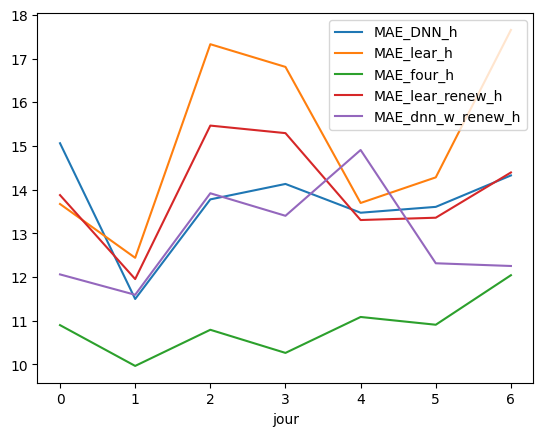

In [261]:
# Aggrégation paar jour de la semaine
df_error_h.groupby('jour').mean().loc[:,mae_h_columns].plot()

<Axes: xlabel='hour'>

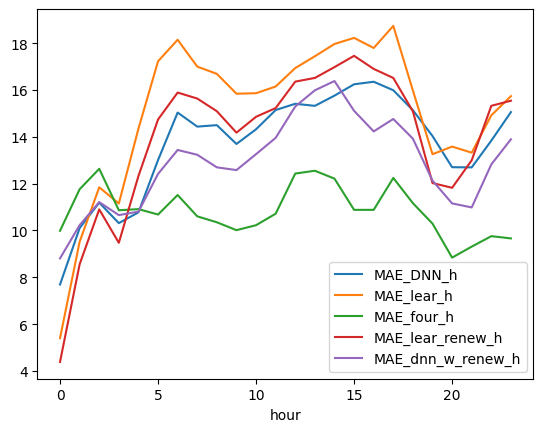

In [265]:
# Aggrégation par heure de la journée 
df_error_h.groupby('hour').mean().loc[:,mae_h_columns].plot()

## Autre

6.732989919354839

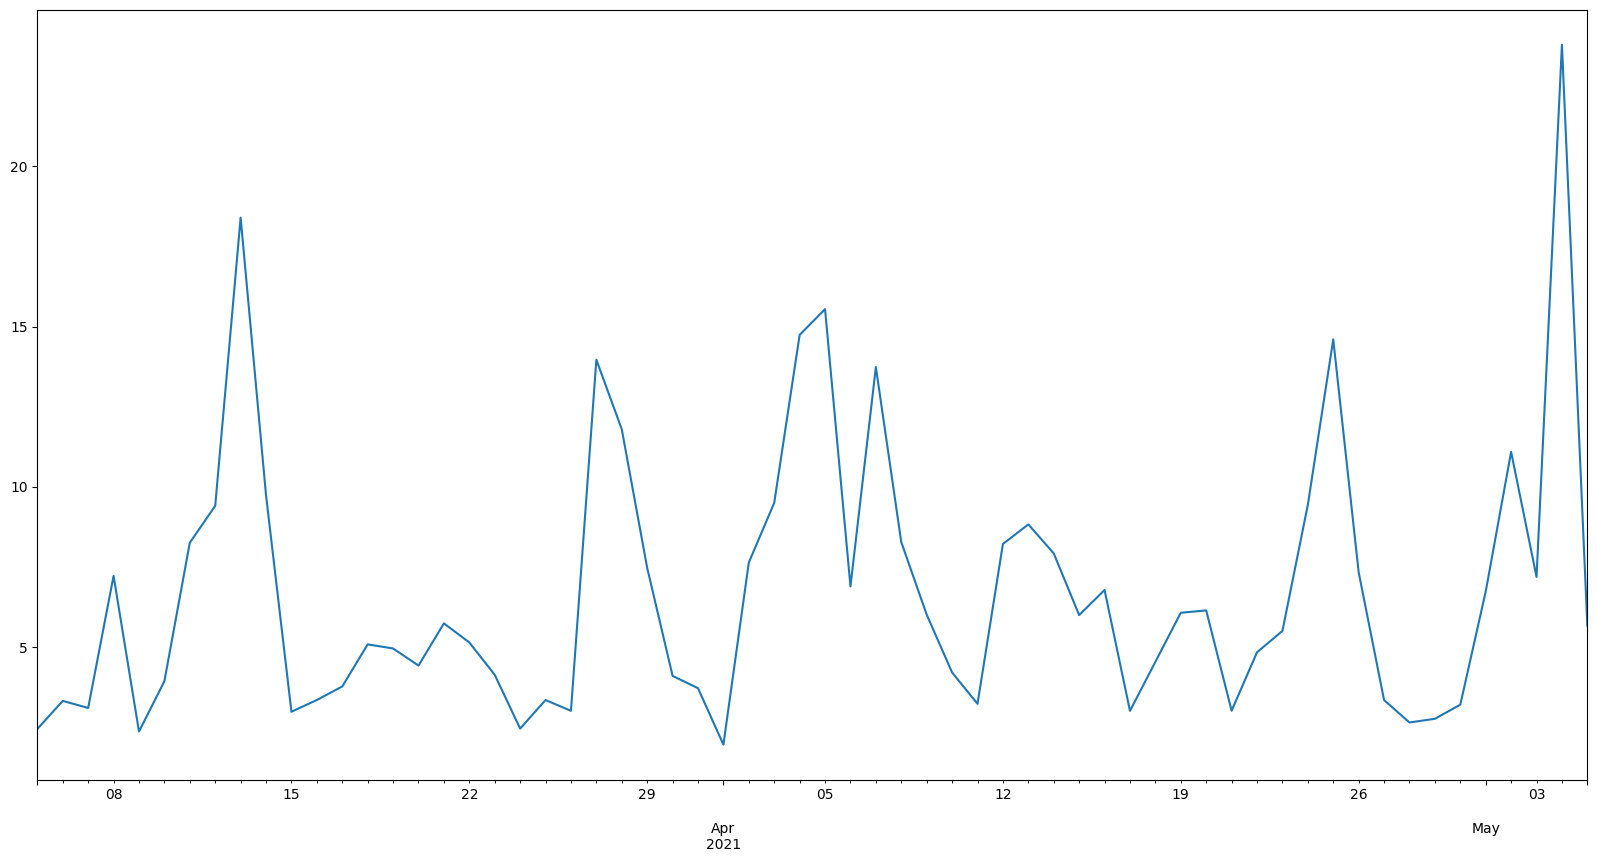

In [99]:
plt.figure(figsize=(20, 10))
df_error['MAE_four'].loc['2021-03-05 00:00:00':'2021-05-05 23:00:00'].plot()
df_error['MAE_four'].loc['2021-03-05 00:00:00':'2021-05-05 23:00:00'].mean()

In [100]:
mask = (df_error['MAE_four'] > 10) & (df_error['MAE_four'] < 20)
df_error.loc[mask]

sMAPE_lear   MAE_lear  sMAPE_four   MAE_four  sMAPE_DNN  \
2021-01-08   15.673542  13.625061   14.099826  12.033500   9.976829   
2021-01-21   22.526993   4.949038   35.741187  11.751250  24.061460   
2021-02-07   57.337998   6.674915   65.836367  11.003083  61.255891   
2021-02-08   15.953219   6.380736   34.918631  19.341792  16.658633   
2021-03-13   29.020930   6.065851   60.326651  18.402458  24.733774   
...                ...        ...         ...        ...        ...   
2022-03-29   11.779395  37.451660    4.862299  12.355958  11.079218   
2022-04-05   20.660891  78.998298    5.714109  19.063083  13.221224   
2022-04-12   13.612234  38.551001    7.520653  18.631083  16.825620   
2022-04-13   11.158522  24.016531    7.222454  17.147250   7.326642   
2022-04-14    6.625341  14.937349    5.001093  11.285583   5.767987   

              MAE_DNN  sMAPE_lear_renew  MAE_lear_renew  sMAPE_dnn_w_renew  \
2021-01-08   9.076143         17.856078       15.408394           8.352655   
2021-01-21   5.495575         24.254675        5.671990          26.085433   
2021-02-07   8.335286         58.025184        7.405948          63.396437   
2021-02-08   6.642697         16.446249        6.517122          15.510974   
2021-03-13   4.675563         33.165703        7.094850          39.776490   
...               ...               ...             ...                ...   
2022-03-29  27.401687               NaN             NaN                NaN   
2022-04-05  45.321408               NaN             NaN                NaN   
2022-04-12  37.614527               NaN             NaN                NaN   
2022-04-13  17.990433               NaN             NaN                NaN   
2022-04-14  13.812682               NaN             NaN                NaN   

            MAE_dnn_w_renew  
2021-01-08         7.498854  
2021-01-21         6.335041  
2021-02-07         9.979360  
2021-02-08         5.876537  
2021-03-13         8.976304  
...                     ...  
2022-03-29              NaN  
2022-04-05              NaN  
2022-04-12              NaN  
2022-04-13              NaN  
2022-04-14              NaN  

[151 rows x 10 columns]

In [101]:
fl_1D = pd.read_csv(lear_preds_path, index_col=0).dropna()

begin_test_date = fl_1D.index[0]
end_test_date = fl_1D.index[-1]
print(type(end_test_date))
time_delta = pd.Timedelta('23 hour')
date_range = pd.date_range(start=begin_test_date, end=pd.to_datetime(end_test_date)+time_delta, freq='H')

fl_1D = pd.DataFrame(data = fl_1D.values.reshape(-1, 1), index=date_range)
fl_1D.columns = ['Lear Forecast']

fd_1D = pd.read_csv(dnn_preds_path, index_col=0).dropna()

begin_test_date = fd_1D.index[0]
end_test_date = fd_1D.index[-1]
print(type(end_test_date))
time_delta = pd.Timedelta('23 hour')
date_range = pd.date_range(start=begin_test_date, end=pd.to_datetime(end_test_date)+time_delta, freq='H')

fd_1D = pd.DataFrame(data = fd_1D.values.reshape(-1, 1), index=date_range)
fd_1D.columns = ['DNN Forecast']


<class 'str'>
<class 'str'>


In [19]:
ff_1D = pd.read_csv(fournisseur_preds_path)

# Convert from Chicago Local time to UTC local
ff_1D.Date_Chicago = pd.to_datetime(ff_1D.Date_Chicago).dt.tz_localize('America/Chicago', ambiguous='infer', nonexistent='shift_forward').dt.tz_convert('UTC').dt.tz_localize(None)
# Set date index
ff_1D= ff_1D.set_index('Date_Chicago', inplace=False)

# Delete duplicates
ff_1D = ff_1D[~ff_1D.index.duplicated(keep='first')]

# 
index_h = pd.date_range(start=ff_1D.index[0], end=ff_1D.index[-1], freq='H')
ff_1D = ff_1D.reindex(index_h)
ff_1D.columns = ['Provider Forecast']
#fill NA with 0
#ff_1D = ff_1D.fillna(0)

df_train, df_test = read_local_data(dataset='FR', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)

index_rv = pd.date_range(start=real_values.index[0], end=pd.to_datetime(real_values.index[-1]) + datetime.timedelta(hours=23), freq='H')
real_values_1D = pd.DataFrame({'price' : real_values.values.reshape(-1, 1).squeeze()}, index = index_rv)
ff_1D['Provider Forecast'] = ff_1D['Provider Forecast'].fillna('XXX')
delta_l = []
for idx, row in ff_1D.iterrows():
    if ff_1D['Provider Forecast'][idx] == 'XXX':
        try:
            delta = np.random.normal(loc=0, scale=10)
            delta_l.append(delta)
            ff_1D['Provider Forecast'][idx] = real_values_1D['price'].loc[idx] + delta  # remplacement des NaN par un bruit blanc de moyenne 0 et d'écart type 4
        except:
            ff_1D['Provider Forecast'][idx] = 0

rv_1D = df_test.loc[:, ['Price']]
rv_1D.columns = ['Real Values']
#rv_1D = pd.DataFrame(rv_1D, index=forecast.index, columns=forecast.columns)



                           Exogenous 2   Exogenous 1    Price
2017-01-01 00:00:00+00:00      73650.0  69539.000000    58.23
2017-01-01 01:00:00+00:00      72350.0  67376.000000    51.95
2017-01-01 02:00:00+00:00      68750.0  65412.000000    47.27
2017-01-01 03:00:00+00:00      65900.0  64557.000000    45.49
2017-01-01 04:00:00+00:00      65000.0  64552.000000    44.50
2017-01-01 05:00:00+00:00      65250.0  64695.000000    44.50
2017-01-01 06:00:00+00:00      65550.0  64956.000000    44.72
2017-01-01 07:00:00+00:00      66100.0  64938.000000    44.22
2017-01-01 08:00:00+00:00      66750.0  65526.000000    42.06
2017-01-01 09:00:00+00:00      68800.0  66426.000000    45.70
2017-01-01 10:00:00+00:00      70050.0  67533.000000    47.91
2017-01-01 11:00:00+00:00      71050.0  68066.000000    49.57
2017-01-01 12:00:00+00:00      71100.0  68120.000000    48.69
2017-01-01 13:00:00+00:00      67750.0  65870.000000    46.91
2017-01-01 14:00:00+00:00      65200.0  64558.000000    46.51
2017-01-

In [20]:
f_all = rv_1D.merge(ff_1D, left_index=True, right_index=True, how='inner')
f_all = f_all.merge(fl_1D, left_index=True, right_index=True, how='inner')
f_all = f_all.merge(fd_1D, left_index=True, right_index=True, how='inner')
f_all.columns

Index(['Real Values', 'Provider Forecast', 'Lear Forecast', 'DNN Forecast'], dtype='object')

(array([-200., -100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,
         700.,  800.]),
 [Text(0, -200.0, '−200'),
  Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

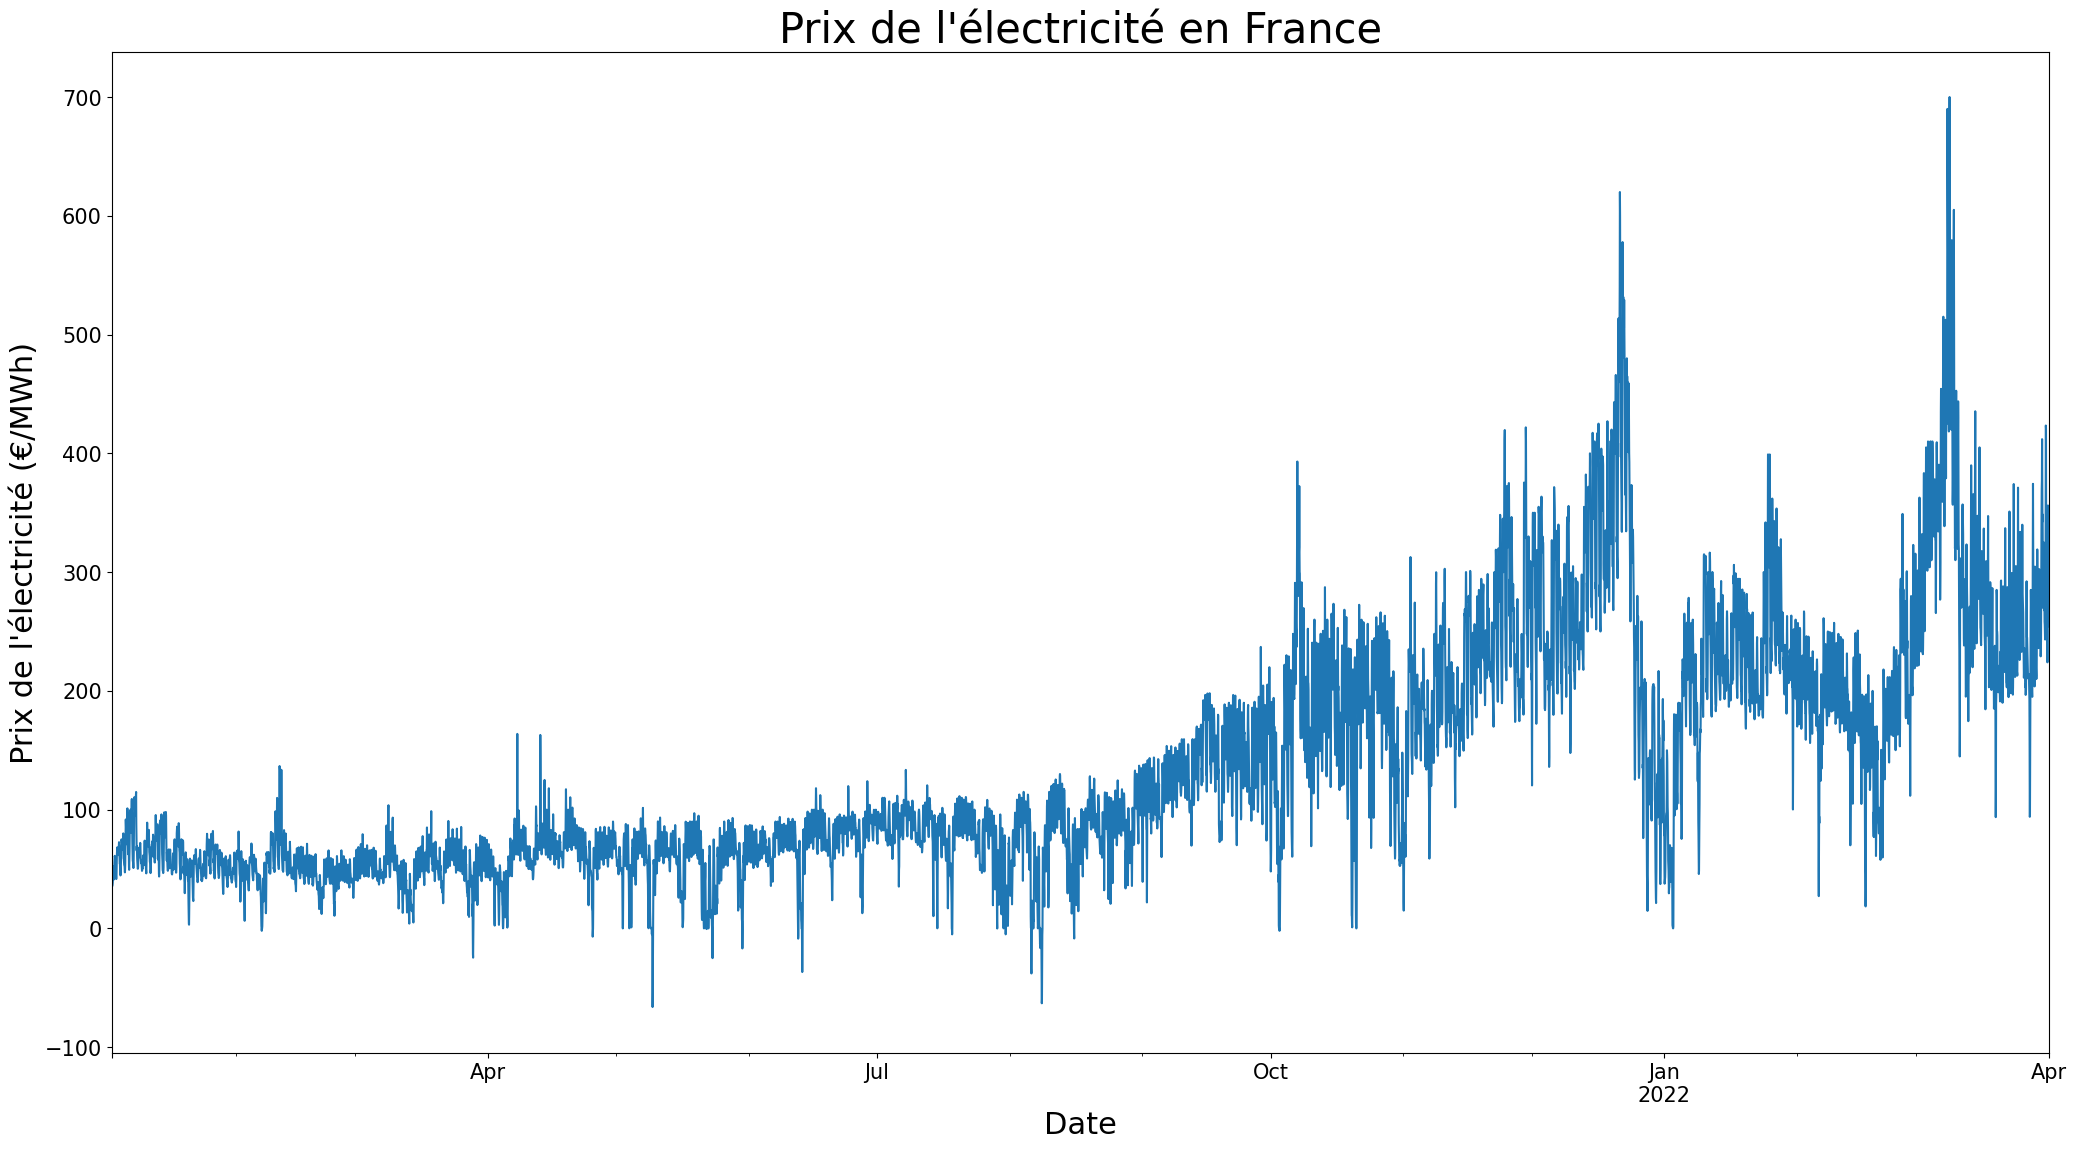

In [21]:
f_all.loc['2021-01-01 00:00:00':'2022-04-01 00:00:00', 'Real Values'].plot(figsize=(25, 13))
plt.xlabel('Date', fontsize=22)
plt.ylabel('Prix de l\'électricité (€/MWh)', fontsize=22)
plt.title('Prix de l\'électricité en France', fontsize=30)
# changer la taille des graduations
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#hyp gaussianité from 10-21
#investiguer saut
#tracer monotone erreur, pté err
# err publi ancienne données, comparaison
# mettre les graphs dans wiki

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140'),
  Text(0, 160.0, '160'),
  Text(0, 180.0, '180')])

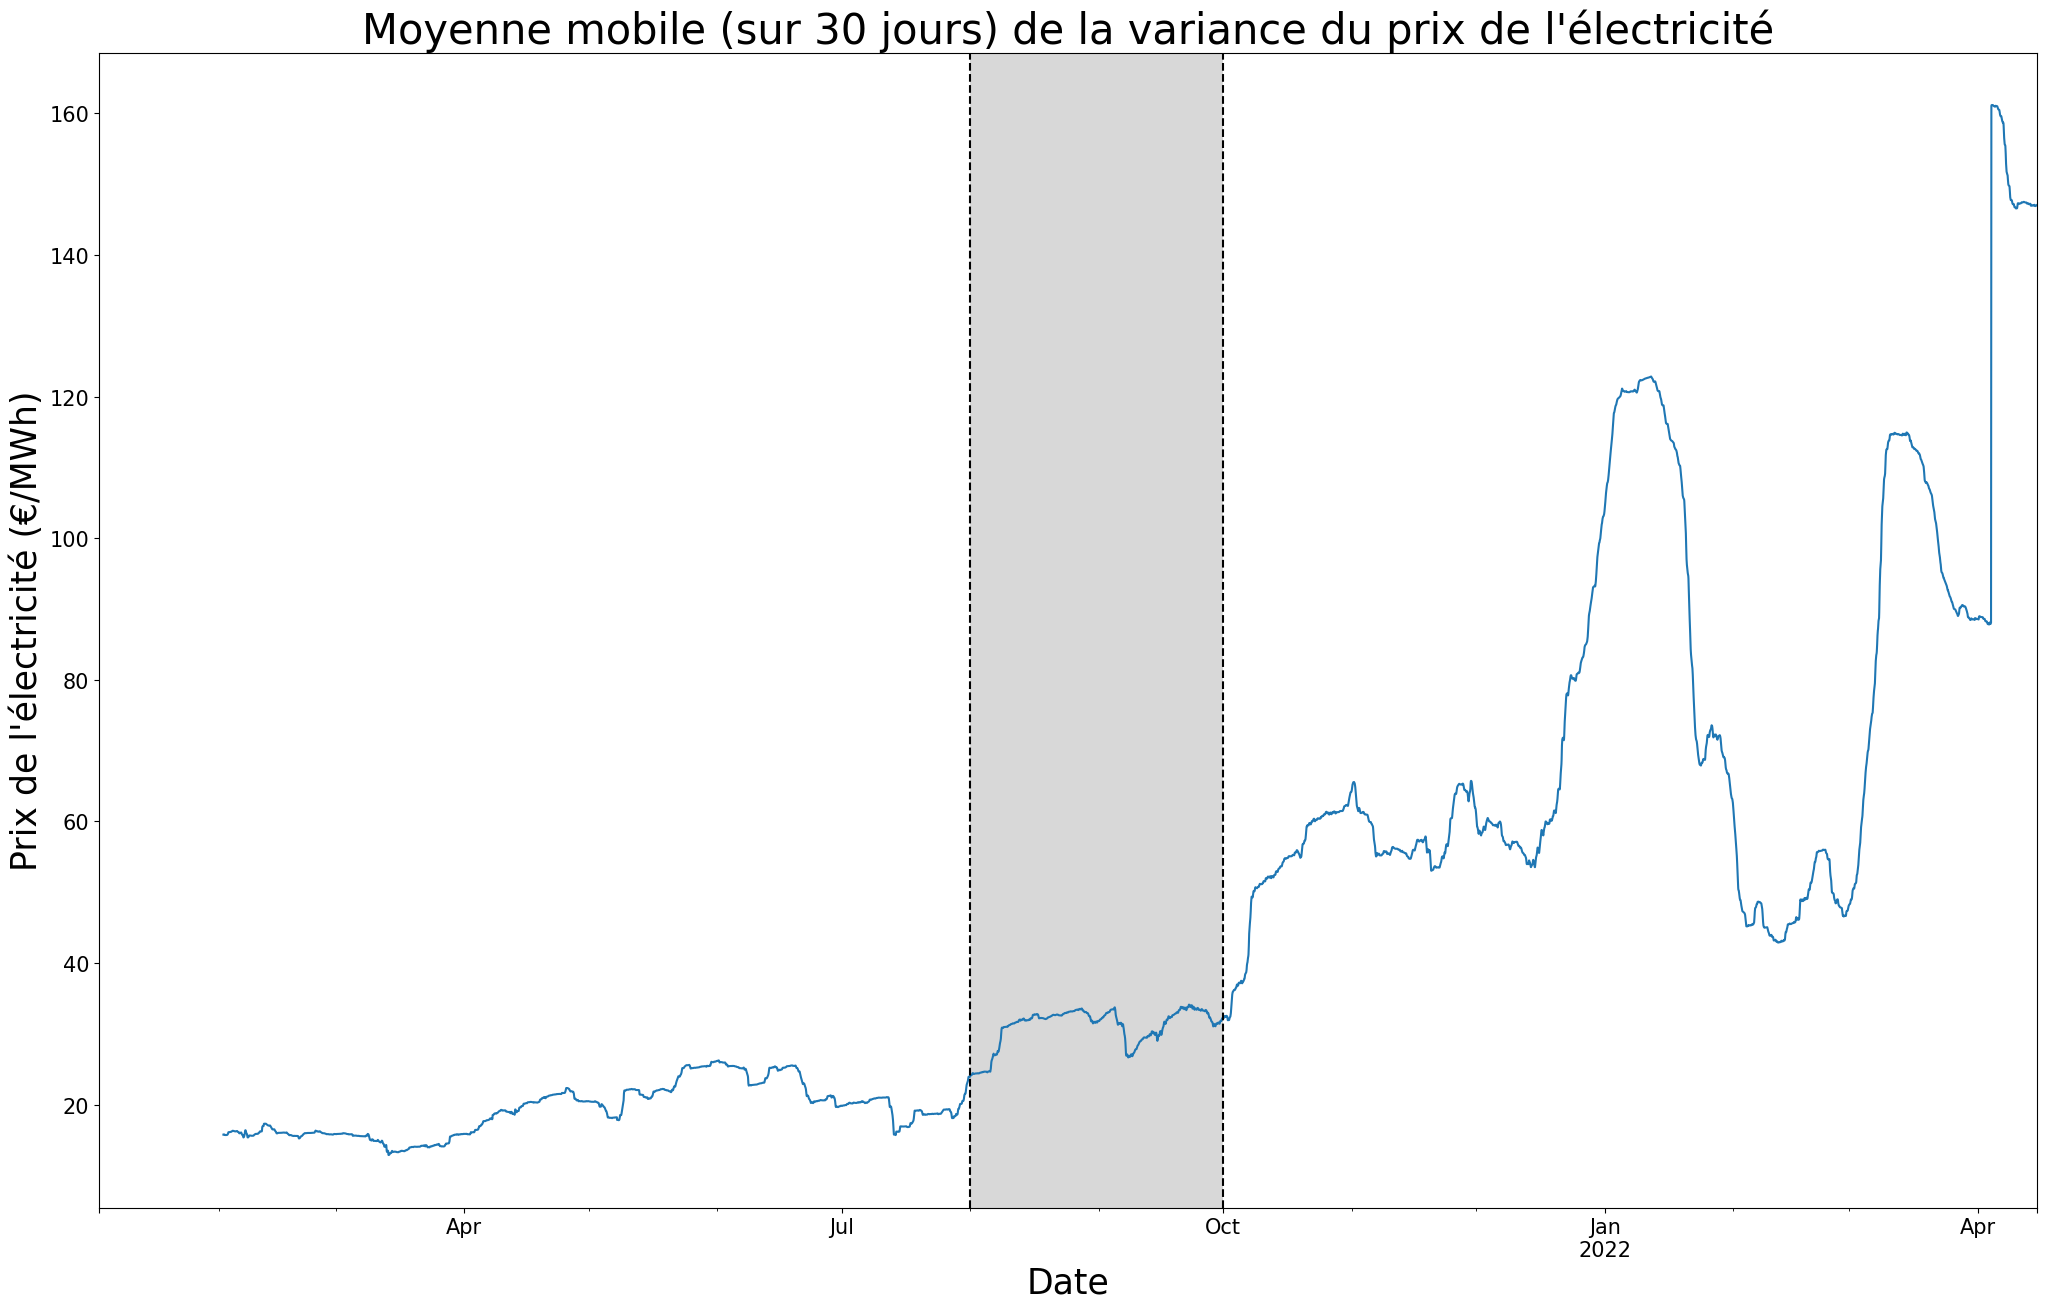

In [22]:
f_all.loc['2021-01-01 00:00:00':'2022-10-01 00:00:00', 'Real Values'].rolling(30*24).std().plot(figsize=(25, 15))
# Ajouter une barre verticale au début d'octobre 2021
plt.axvline(x='2021-10-01 00:00:00', color='black', linestyle='--')
plt.axvline(x='2021-08-01 00:00:00', color='black', linestyle='--')
# Hachurer la zone entre les deux barres verticales
plt.axvspan('2021-08-01 00:00:00', '2021-10-01 00:00:00', facecolor='grey', alpha=0.3)
# Ajouter du texte dans la zone hachuré 'Zone de changement de structure'
#plt.text('2021-08-01 00:00:00', 100, '  Zone de changement', rotation=0, fontsize=25, color='black')
#plt.text('2021-08-01 00:00:00', 90, '  de structure', rotation=0, fontsize=25, color='black')
plt.ylabel('Prix de l\'électricité (€/MWh)', fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.title('Moyenne mobile (sur 30 jours) de la variance du prix de l\'électricité', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

5728


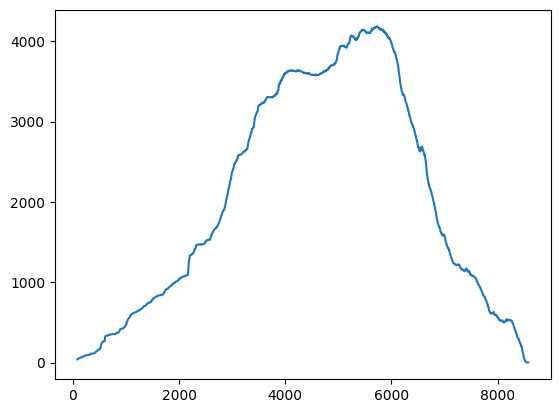

In [72]:
import statsmodels.api as sm 

exo = pd.read_csv(real_values_path).drop('Price', axis=1)
exo = exo.set_index('Unnamed: 0', drop=True)

X = np.array(exo.loc['2021-01-03 00:00:00':'2021-12-30 00:00:00'])
y = np.array(f_all.loc['2021-01-03 00:00:00':'2021-12-30 00:00:00', 'Real Values'])
model = sm.OLS(y, X)
results = model.fit()
u = results.resid
SSR = u.T @ u
n = len(X)

F_list = []
a_deb = int((len(X)*0.01)//1)
a_fin = int((len(X)*0.99)//1)

rn = np.arange(a_deb, a_fin, 1).astype(int)

for i in rn:

    X1 = X[0:i]
    X2 = X[i:]
    y1 = y[0:i]
    y2 = y[i:]

    model1 = sm.OLS(y1, X1)
    results1 = model1.fit()
    u1 = results1.resid
    SSR1 = u1.T @ u1
    #print(SSR1)

    model2 = sm.OLS(y2, X2)
    results2 = model2.fit()
    u2 = results2.resid
    SSR2 = u2.T @ u2
    #print(SSR2)

    F = ((SSR - (SSR1 + SSR2))/(SSR1 + SSR2))*(n-4)/4 # ddof = 8 car 4 variables pour chaque set de données (et 2 sets de données)
    F_list.append(F)

plt.plot(rn, F_list)
F_max = np.argmax(F_list) + int(a_deb)
#df_F = pd.DataFrame({'F' : F_list}, index = exo.loc['2021-01-03 00:00:00'+ a_deb:'2022-04-14 00:00:00'-a_fin].index)

print(F_max)

In [62]:
pd.to_datetime('2021-01-03 00:00:00') + pd.to_timedelta(F_max, unit='h')

Timestamp('2021-08-18 16:00:00')

In [29]:
test = f_all.loc['2022-01-02 00:00:00':'2022-01-13 00:00:00']
# create a column where you compute MAE and sMAPE for each Forecast
test['MAE_DNN'] = np.abs(test['DNN Forecast'] - test['Real Values'])
test['MAE_lear'] = np.abs(test['Lear Forecast'] - test['Real Values'])
test['MAE_four'] = np.abs(test['Provider Forecast'] - test['Real Values'])

test['sMAPE_DNN'] = 100 * np.abs(test['DNN Forecast'] - test['Real Values']) / (np.abs(test['DNN Forecast']) + np.abs(test['Real Values']))
test['sMAPE_lear'] = 100 * np.abs(test['Lear Forecast'] - test['Real Values']) / (np.abs(test['Lear Forecast']) + np.abs(test['Real Values']))
test['sMAPE_four'] = 100 * np.abs(test['Provider Forecast'] - test['Real Values']) / (np.abs(test['Provider Forecast']) + np.abs(test['Real Values']))




test.describe()

/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_6003/3265335867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MAE_DNN'] = np.abs(test['DNN Forecast'] - test['Real Values'])
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_6003/3265335867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['MAE_lear'] = np.abs(test['Lear Forecast'] - test['Real Values'])
/var/folders/h9/3f0fc1qs2t3943x127_ynxmc0000gn/T/ipykernel_6003/3265335867.py:5: SettingWithCopyWarning: 
A value is t

Real Values  Lear Forecast  DNN Forecast     MAE_DNN    MAE_lear  \
count   265.000000     265.000000    265.000000  265.000000  265.000000   
mean    182.710642     163.659296    169.682859   33.273664   39.978451   
std      76.752744      68.600275     73.559199   23.051935   32.212939   
min       0.060000     -25.387307      6.132919    0.193892    0.031890   
25%     146.430000     116.456051    118.217239   16.053012   14.450602   
50%     191.850000     170.449356    169.318695   26.960541   30.570360   
75%     236.760000     210.809354    217.930359   48.633224   58.542553   
max     316.400000     327.725958    325.142883  120.341651  173.306528   

        sMAPE_DNN  sMAPE_lear  
count  265.000000  265.000000  
mean    13.509827   16.056812  
std     15.884495   18.771506  
min      0.044650    0.008738  
25%      4.048889    4.079865  
50%      8.593970    9.528630  
75%     15.412107   20.085125  
max     98.411014  100.000000

<AxesSubplot:>

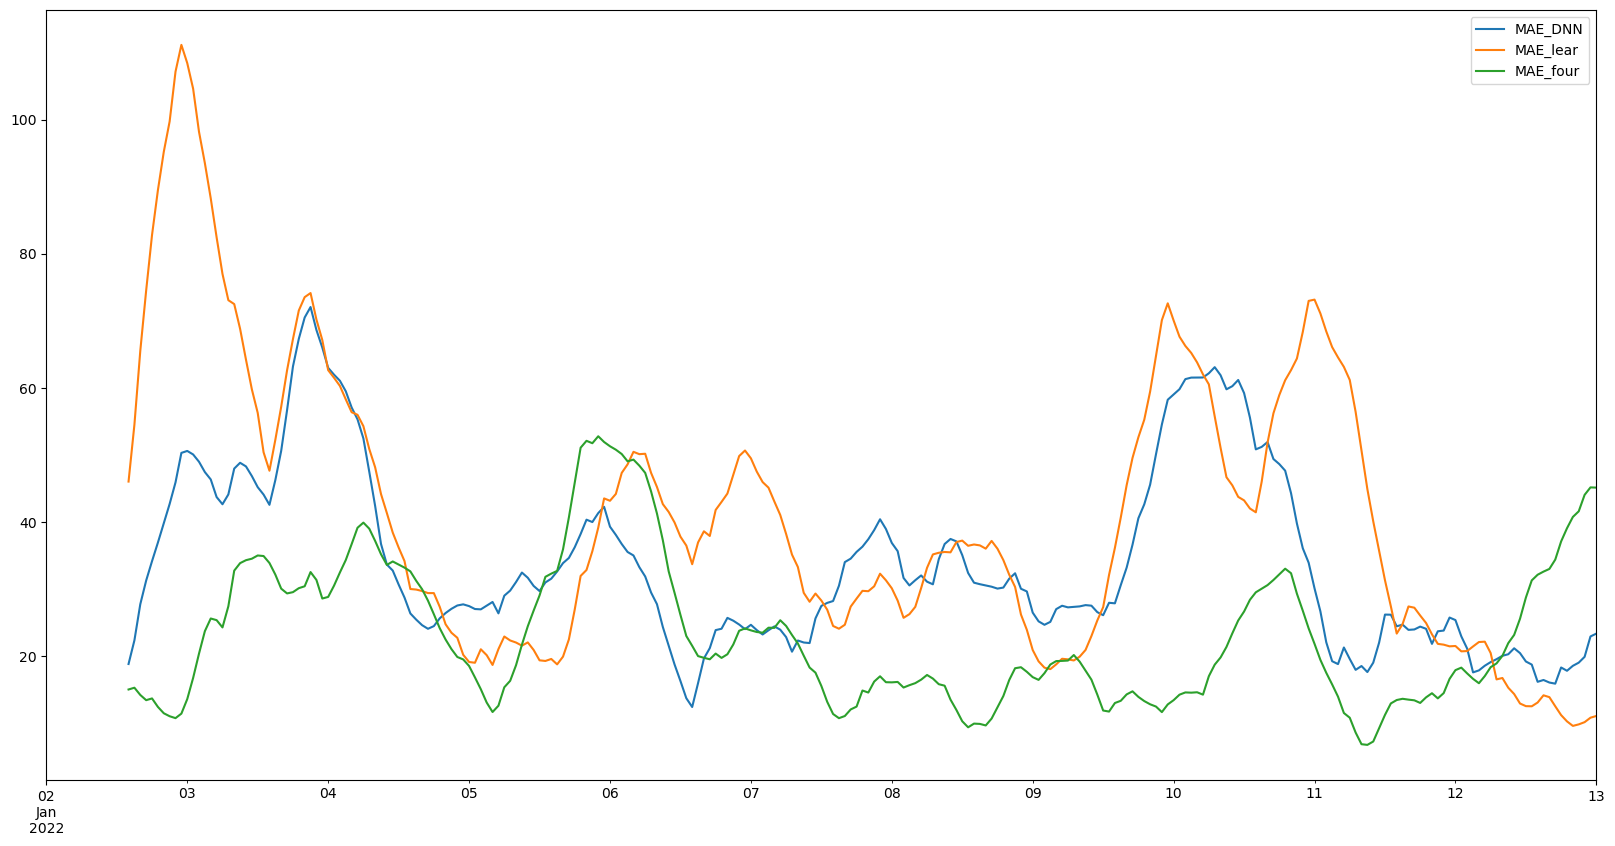

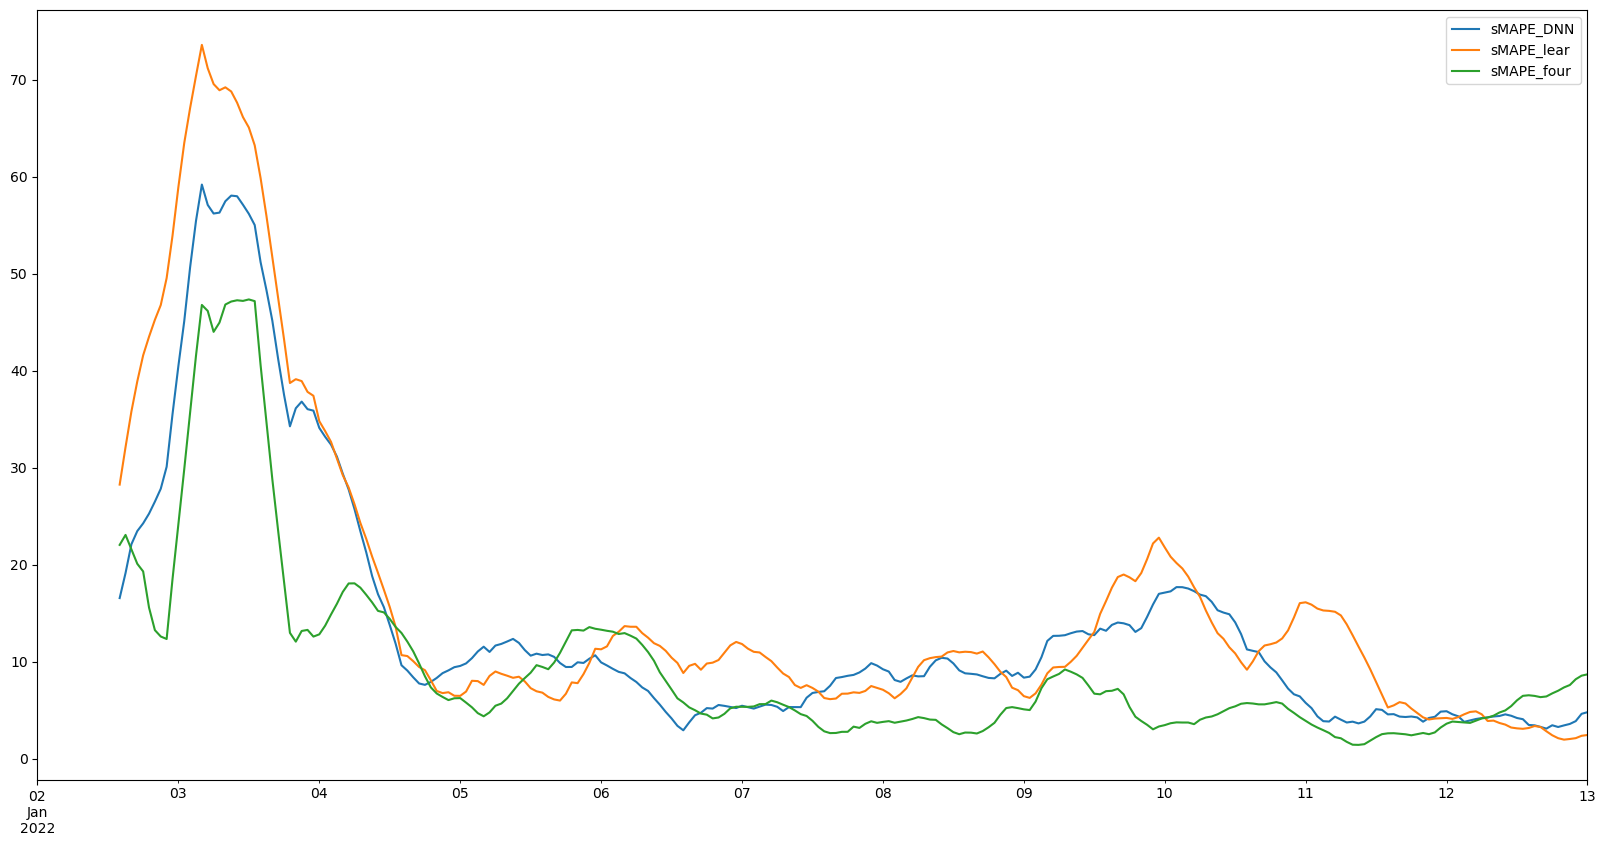

In [16]:
test[['MAE_DNN', 'MAE_lear', 'MAE_four']].rolling(15).mean().plot(figsize=(20, 10))

test[['sMAPE_DNN', 'sMAPE_lear', 'sMAPE_four']].rolling(15).mean().plot(figsize=(20, 10))

In [14]:
f_all.tail()

Real Values  Provider Forecast  Lear Forecast  \
2022-04-15 00:00:00       197.03            209.105     193.249407   
2022-04-15 01:00:00       193.70            201.155     189.581078   
2022-04-15 02:00:00       192.21            200.503     183.671500   
2022-04-15 03:00:00       196.86            206.363     196.575557   
2022-04-15 04:00:00       205.33            230.759     248.117818   

                     DNN Forecast  
2022-04-15 00:00:00    191.381546  
2022-04-15 01:00:00    185.590103  
2022-04-15 02:00:00    194.906647  
2022-04-15 03:00:00    211.072021  
2022-04-15 04:00:00    263.180725

In [15]:
forecast_all.tail()

NameError: name 'forecast_all' is not defined

In [ ]:
forecast_fournisseur.loc['2022-01-01 00:00:00':'2022-01-01 23:00:00']

In [9]:
preds_papier = pd.read_csv('/Users/dorianfitton/Library/Mobile Documents/com~apple~CloudDocs/Documents/Cours_Télécom/fil_rouge/fil_rouge.nosync/forecasts/Forecasts_FR_DNN_LEAR_ensembles.csv', index_col=0)

In [40]:
preds_papier.tail()

Real price      DNN 1      DNN 2      DNN 3      DNN 4  \
2016-12-31 19:00:00       69.72  75.286461  80.713867  76.547020  81.705856   
2016-12-31 20:00:00       57.10  63.648335  74.201370  68.341560  74.516251   
2016-12-31 21:00:00       54.49  58.358040  69.222748  61.842636  68.523415   
2016-12-31 22:00:00       54.95  58.250675  69.352234  62.050411  68.129387   
2016-12-31 23:00:00       61.19  57.037907  67.203735  59.246819  65.935333   

                     DNN Ensemble  LEAR 56  LEAR 84  LEAR 1092  LEAR 1456  \
2016-12-31 19:00:00     78.563301  72.0705  76.6338    78.0452    80.6353   
2016-12-31 20:00:00     70.176879  65.9544  69.7156    71.5820    70.1353   
2016-12-31 21:00:00     64.486710  59.8024  60.5154    65.3912    62.8743   
2016-12-31 22:00:00     64.445677  64.6110  63.2037    67.4310    64.7320   
2016-12-31 23:00:00     62.355948  63.9397  60.9989    62.0516    59.9640   

                     LEAR Ensemble  
2016-12-31 19:00:00      76.846200  
2016-12-31 20:00:00      69.346825  
2016-12-31 21:00:00      62.145825  
2016-12-31 22:00:00      64.994425  
2016-12-31 23:00:00      61.738550

In [ ]:
forecast_papier =  pd.read_csv('/Users/dorianfitton/Library/Mobile Documents/com~apple~CloudDocs/Documents/Cours_Télécom/fil_rouge/fil_rouge.nosync/forecasts/Forecasts_FR_DNN_LEAR_ensembles.csv', index_col=0)

begin_test_date = forecast_papier.index[0]
print(begin_test_date)
end_test_date = forecast_papier.index[-1]
print(end_test_date)
path_datasets_folder = os.path.join('.', 'examples/datasets')
print(path_datasets_folder)
path_recalibration_folder = os.path.join('.', 'examples/experimental_files')
print(path_recalibration_folder)

dataset = 'FR'
years_test = 2
calibration_window = 4

df_train, df_test = read_local_data(dataset='FR', path = path_datasets_folder , years_test=None,
                              begin_test_date=begin_test_date, end_test_date=end_test_date)


# Defining unique name to save the forecast_papier
forecast_papier_file_name = 'fc_nl' + '_dat' + str(dataset) +'_BEGIN_' + str(begin_test_date) +'_YT' + str(years_test) + \
                     '_CW' + str(calibration_window) + '.csv'

forecast_papier_file_path = os.path.join(path_recalibration_folder, forecast_papier_file_name)


# Defining empty forecast_papier array and the real values to be predicted in a more friendly format
#forecast_papier = pd.DataFrame(index=df_test.index[::24], columns=['h' + str(k) for k in range(24)])
real_values = df_test.loc[:, ['Price']].values.reshape(-1, 24)
real_values = pd.DataFrame(real_values, index=forecast_papier.index, columns=forecast_papier.columns)

forecast_papier_dates = forecast_papier.index

MAE_papier = np.zeros(len(forecast_papier.index))
SMAPE_papier = np.zeros(len(forecast_papier.index))
i=0
for date in forecast_papier.index:
    mae = np.mean(MAE(forecast_papier.loc[:date].values.squeeze(), real_values.loc[:date].values)) 
    smape = np.mean(sMAPE(forecast_papier.loc[:date].values.squeeze(), real_values.loc[:date].values)) * 100

    SMAPE_papier[i]=smape
    MAE_papier[i]=mae
    i+=1
forecast_papier.index = pd.to_datetime(forecast_papier.index).tz_localize(None)
real_values.index = pd.to_datetime(real_values.index).tz_localize(None)

print('sMAPE: {:.2f}%  |  MAE: {:.3f}'.format(np.mean(SMAPE_papier), np.mean(MAE_papier)))


d_papier = {'sMAPE_papier': SMAPE_papier, 'MAE_papier': MAE_papier}
df_er_papier = pd.DataFrame(data=d_papier, index= forecast_papier.index)
plt.figure(figsize=(20, 10))
plt.plot(df_er_papier)
plt.title('lear ERRORS')
plt.show()